|||
|---|---|
|title |Tourist_cn|
|author |Kai Wu|
|update |2024/11/6|


游客满意度调数据（模拟数据，42变量，373条记录）
<img src="http://kaiwu.city/images/tourist_satisfaction_survey.png" width="150" align=left>
这是随机数模拟的数据，练习使用，分析结论同学不要太认真
<br>

（1）电子问卷
<img src="http://kaiwu.city/images/word_docx.png" width="40" align=left>
http://kaiwu.city/openfiles/tourist_satisfaction_questionnaire_cn.docx
<br>

（2）csv格式调研数据
<img src="http://kaiwu.city/images/csv_icon2.png" width="40" align=left>
http://kaiwu.city/openfiles/tourist.csv
<br>

（3）Excel格式调研数据
<img src="http://kaiwu.city/images/excel_xlsx.png" width="40" align=left>
http://kaiwu.city/openfiles/tourist_cn.xlsx 
<br>

（4）SPSS格式调研数据
<img src="http://kaiwu.city/images/spss_sav.png" width="40" align=left>
http://kaiwu.city/openfiles/data_tourist_cn.sav 



# 1.data preparation数据预处理

data preparation（数据准备）与data wrangling、data munging、data
cleaning的含义非常接近<p>
数据整理（通常被称为数据清洗或数据预处理）是将原始数据转换和准备成可用于分析的格式的关键过程。<p>
它涉及清理、结构化和丰富数据，以确保准确性、一致性和与分析工具及技术的兼容性。<p>
在数据科学领域，有效的数据整理对于构建强大的模型和获取有意义的洞察至关重要。



## 1.1 load packages载入拓展功能包

In [1]:
#-*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import matplotlib
# Set the font to a Chinese font.
# font = FontProperties(fname='D:/kaiwu_datasets/fonts/font.ttf')

In [2]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号


<div style="width: 100%; text-align: left;">
    <table style="margin-left: 0; text-align: left;">
        <tr>
            <th>font</th>
            <th>中文字体</th>
        </tr>
        <tr>
            <td>SimHei</td>
            <td>中文黑体</td>
        </tr>
        <tr>
            <td>Kaiti</td>
            <td>中文楷体</td>
        </tr>
        <tr>
            <td>LiSu</td>
            <td>中文隶书</td>
        </tr>
        <tr>
            <td>FangSong</td>
            <td>中文仿宋</td>
        </tr>
        <tr>
            <td>YouYuan</td>
            <td>中文幼圆</td>
        </tr>
        <tr>
            <td>STSong</td>
            <td>华文宋体</td>
        </tr>
    </table>
</div>


	

## 1.2 import dataset导入数据

### 1.2.1 设定工作文件夹

In [3]:

#设定工作文件夹, 根据自己电脑的情况进行修改
datafolder='D:/tdata/tourist_CN_python/'



#文件夹的设定，注意斜线的方向
#datafolder<-'D:\\tdata\\tourist_CN_python\\'


#数据可以通过网盘直链下载
# http://kaiwu.city/openfiles/tourist.csv
#373条记录（被调查者），42个变量
#数据下载后存入datafolder


# 显示所有行，所有列
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#pd.set_option('display.max_rows', 30)
#pd.set_option('display.max_columns', 30)

### 1.2.2 导入csv格式数据

数据可以通过笔者个人网站下载
http://kaiwu.city/openfiles/tourist.csv
373条记录（被调查者），42个变量 数据下载后存入datafolder

read.csv是常见的读入数据方法（csv格式，以逗号为分隔符的数据集）

In [4]:
#第1种方法：通过网络文件读取数据
#tourist=pd.read_csv('http://kaiwu.city/openfiles/tourist.csv',index_col=0)

#第2种方法：通过本地文件读取数据
tourist=pd.read_csv(datafolder+'tourist.csv',index_col=0)

#tourist=pd.read_csv('D:/tdata/tourist_CN_python/tourist.csv',index_col=0)


#2种相同效果的文件名及路径
#第1种：'D:/tdata/tourist_CN_python/tourist.csv'
#第2种：datafolder+'tourist.csv'



#index_col=0 表示表头——数据中包含变量名的，python跟很多编程语言类似，从0开始计数
#head 表示呈现前5行数据，tail显示后5行数据，括号里可以更改数字，例如tourist.head(30)——前30条数据
tourist.head()
#tourist.tail()




gender  byear  region  income  expense  type3  type2  thotel  sat1  \
sid                                                                          
rec001       1   1971       1    2708      432      3      2       3     4   
rec002       1   1995       1    1884      238      2      1       3     5   
rec003       1   1990       2    2458      399      3      2       3     3   
rec004       2   1970       2    2726      245      2      1       1     5   
rec005       1   1964       4    3084      287      2      2       2     5   

        sat2  sat3  sat4  sat5  sat6  ri1  ri2  ri3  ri4  ri5  rp1  rp2  rp3  \
sid                                                                            
rec001     2     2     3     4     4    4    4    4    5    4    4    5    4   
rec002     5     4     5     3     5    4    3    4    4    5    4    3    4   
rec003     4     5     3     3     2    5    5    5    5    5    5    5    4   
rec004     2     3     5     4     4    4    5    5    5    5    4    5    5   
rec005     3     5     2     4     5    5    5    5    5    5    5    5    5   

        rp4  rp5  te1  te2  te3  te4  te5  te6  te7  te8  zh1  zh2  zh3  zh4  \
sid                                                                            
rec001    5    4    4    4    4    4    4    4    4    4    3    1    1    2   
rec002    4    5    5    5    4    4    4    5    3    4    4    4    5    3   
rec003    5    5    3    4    4    4    4    4    4    4    1    1    2    2   
rec004    5    5    4    4    4    4    5    4    2    4    3    3    3    3   
rec005    5    5    4    5    4    4    5    5    4    5    1    1    1    4   

        zh5  zh6  zh7  latitude  longitude  
sid                                         
rec001    3    2    2  31.24039  121.66525  
rec002    5    5    5  31.20866  121.46039  
rec003    1    3    1  31.10409  121.39581  
rec004    2    2    2  31.06726  121.16962  
rec005    2    1    1  31.17709  121.67953

In [5]:
tourist.dtypes

gender         int64
byear          int64
region         int64
income         int64
expense        int64
type3          int64
type2          int64
thotel         int64
sat1           int64
sat2           int64
sat3           int64
sat4           int64
sat5           int64
sat6           int64
ri1            int64
ri2            int64
ri3            int64
ri4            int64
ri5            int64
rp1            int64
rp2            int64
rp3            int64
rp4            int64
rp5            int64
te1            int64
te2            int64
te3            int64
te4            int64
te5            int64
te6            int64
te7            int64
te8            int64
zh1            int64
zh2            int64
zh3            int64
zh4            int64
zh5            int64
zh6            int64
zh7            int64
latitude     float64
longitude    float64
dtype: object

### 1.2.3 练习1 导入csv格式数据

In [6]:
# 练习1 ： 下载数据，试着用本地磁盘文件，修改datafolder目录，读入数据。

#第1种方法：通过网络文件读取数据
# tourist=pd.read_csv('http://kaiwu.city/openfiles/tourist.csv',index_col=0)

#第2种方法：通过本地文件读取数据
# tourist=pd.read_csv(datafolder+'tourist.csv',index_col=0)
# tourist=pd.read_csv('D:/tdata/tourist_CN_python/tourist.csv',index_col=0)







### 1.2.4 导入SPSS格式数据

SPSS格式数据下载网址
http://kaiwu.city/openfiles/data_tourist_cn.sav


In [7]:
# 参考网址 https://www.marsja.se/how-to-read-write-spss-files-in-python-pandas
# 需要pyreadstat
# pip install pyreadstat
# import pyreadstat

#tourist_spss=pd.read_spss(datafolder+"data_tourist_cn.sav")

# tourist_spss.head()



### 1.2.5 导入excel格式数据

参考网址
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html

Excel格式调研数据 
http://kaiwu.city/openfiles/tourist_cn.xlsx

In [8]:
# 需要openpyxl
#pip install openpyxl
# import openpyxl

#第1种方法：通过网络文件读取数据
# tourist_excel=pd.read_excel('http://kaiwu.city/openfiles/tourist_cn.xlsx',index_col=0)

#第2种方法：通过本地文件读取数据
#tourist_excel=pd.read_excel(datafolder+'tourist_cn.xlsx',index_col=0)

#tourist_excel=pd.read_excel('D:/tdata/tourist_CN_python/tourist_cn.xlsx',index_col=0)



# tourist_excel.head()
#tourist.tail()



## 1.3 value labels变量值标签

### 1.3.1 变量值标签：示例

In [9]:
tourist['gender_class'] = np.where(tourist['gender']==1, '男', '女')

In [10]:
tourist.head()

gender  byear  region  income  expense  type3  type2  thotel  sat1  \
sid                                                                          
rec001       1   1971       1    2708      432      3      2       3     4   
rec002       1   1995       1    1884      238      2      1       3     5   
rec003       1   1990       2    2458      399      3      2       3     3   
rec004       2   1970       2    2726      245      2      1       1     5   
rec005       1   1964       4    3084      287      2      2       2     5   

        sat2  sat3  sat4  sat5  sat6  ri1  ri2  ri3  ri4  ri5  rp1  rp2  rp3  \
sid                                                                            
rec001     2     2     3     4     4    4    4    4    5    4    4    5    4   
rec002     5     4     5     3     5    4    3    4    4    5    4    3    4   
rec003     4     5     3     3     2    5    5    5    5    5    5    5    4   
rec004     2     3     5     4     4    4    5    5    5    5    4    5    5   
rec005     3     5     2     4     5    5    5    5    5    5    5    5    5   

        rp4  rp5  te1  te2  te3  te4  te5  te6  te7  te8  zh1  zh2  zh3  zh4  \
sid                                                                            
rec001    5    4    4    4    4    4    4    4    4    4    3    1    1    2   
rec002    4    5    5    5    4    4    4    5    3    4    4    4    5    3   
rec003    5    5    3    4    4    4    4    4    4    4    1    1    2    2   
rec004    5    5    4    4    4    4    5    4    2    4    3    3    3    3   
rec005    5    5    4    5    4    4    5    5    4    5    1    1    1    4   

        zh5  zh6  zh7  latitude  longitude gender_class  
sid                                                      
rec001    3    2    2  31.24039  121.66525            男  
rec002    5    5    5  31.20866  121.46039            男  
rec003    1    3    1  31.10409  121.39581            男  
rec004    2    2    2  31.06726  121.16962            女  
rec005    2    1    1  31.17709  121.67953            男

In [11]:
tourist['gender_class'].value_counts()

gender_class
男    214
女    159
Name: count, dtype: int64

<Axes: xlabel='gender_class'>

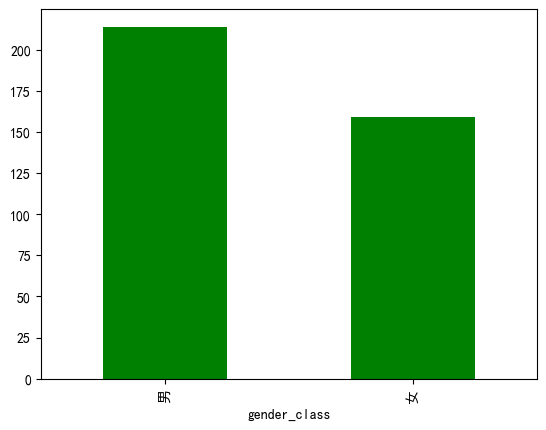

In [12]:
tourist['gender_class'].value_counts().plot(kind="bar",color='green')

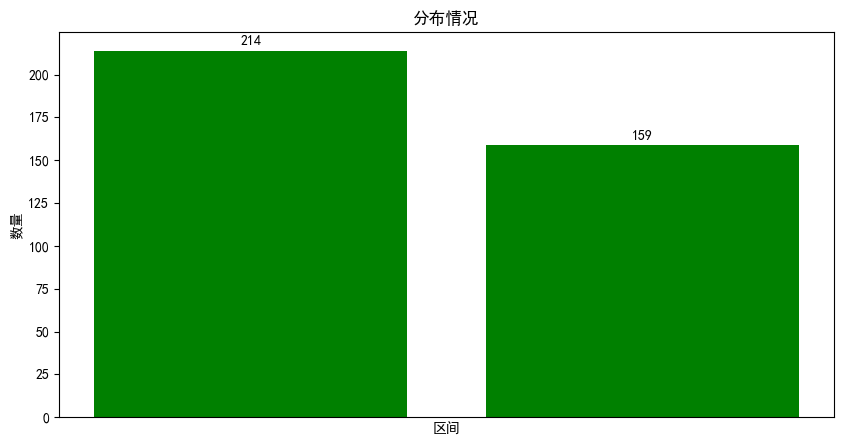

In [17]:

# 1.创建画布
plt.figure(figsize=(10, 5))

# 2.绘制图像
n, bins, patches = plt.hist(tourist['gender_class'].values, bins=2,rwidth=0.8,color='green')
# n 为 各个bin里面的计数; bins 为 bin 的边界值组成的 列表; patches 为 图形

# 2.0 在每个条柱上标注数量
for i in range(len(n)):
        plt.text(bins[i]+(bins[1]-bins[0])/2, n[i]*1.01, int(n[i]), ha='center', va= 'bottom')
        
# 2.1 添加刻度
#min_1 = tourist['gender_class'].min()
#max_1 = tourist['gender_class'].max()

#t1 = np.linspace(min_1, max_1, num=11)

#plt.xticks(t1)

# 2.2 添加网格和标题
#plt.grid()
plt.title("分布情况")
plt.xlabel("区间")
plt.ylabel("数量")

# 3.保存图片
plt.savefig(datafolder+'1gender_frequency.png')

# 4.显示
plt.show()


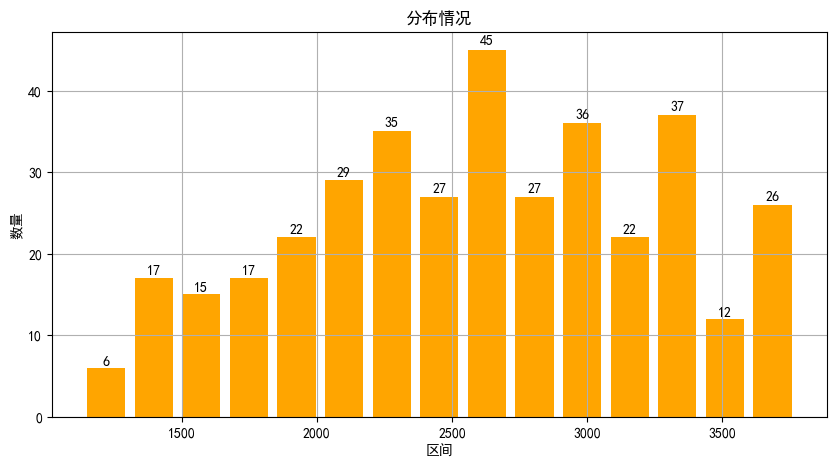

In [18]:
# 1.创建画布
plt.figure(figsize=(10, 5))

# 2.绘制图像
n, bins, patches = plt.hist(tourist['income'].values, bins=15,rwidth=0.8,color="orange")
# n 为 各个bin里面的计数; bins 为 bin 的边界值组成的 列表; patches 为 图形

# 2.0 在每个条柱上标注数量
for i in range(len(n)):
        plt.text(bins[i]+(bins[1]-bins[0])/2, n[i]*1.01, int(n[i]), ha='center', va= 'bottom')
        
# 2.1 添加刻度
min_1 = tourist['income'].min()
max_1 = tourist['income'].max()

#t1 = np.linspace(min_1, max_1, num=11)

#plt.xticks(t1)

# 2.2 添加网格和标题
plt.grid()
plt.title("分布情况")
plt.xlabel("区间")
plt.ylabel("数量")

# 3.保存图片
plt.savefig(datafolder+'2income_frequency.png')

# 4.显示
plt.show()

### 1.3.2 变量值标签：根据调查问卷

In [19]:
#value labels变量值标签，参考电子问卷
#   https://od.lk/d/178313252_qENBP/tourist_satisfaction_questionnaire_cn.docx 

#   https://od.lk/d/178313253_whACZ/tourist_satisfaction_questionnaire_cn.pdf


tourist['gender_class'] = np.where(tourist['gender']==1, '男', '女')

tourist.loc[(tourist['thotel']==1) , 'thotel_class'] = "经济型酒店"
tourist.loc[(tourist['thotel']==2) , 'thotel_class'] = "豪华型酒店"
tourist.loc[(tourist['thotel']==3) , 'thotel_class'] =  "民宿"
tourist.loc[(tourist['thotel']==4) , 'thotel_class'] = "酒店式公寓"

tourist.loc[(tourist['type3']==1) , 'type3_class'] = "自然风光"
tourist.loc[(tourist['type3']==2) , 'type3_class'] = "历史文化"
tourist.loc[(tourist['type3']==3) , 'type3_class'] = "自然与历史混合"

tourist.loc[(tourist['type2']==1) , 'type2_class'] = "观赏型"
tourist.loc[(tourist['type2']==2) , 'type2_class'] = "参与型"

tourist.head(10)



gender  byear  region  income  expense  type3  type2  thotel  sat1  \
sid                                                                          
rec001       1   1971       1    2708      432      3      2       3     4   
rec002       1   1995       1    1884      238      2      1       3     5   
rec003       1   1990       2    2458      399      3      2       3     3   
rec004       2   1970       2    2726      245      2      1       1     5   
rec005       1   1964       4    3084      287      2      2       2     5   
rec006       1   1965       5    2184      216      3      1       3     4   
rec007       2   1954       1    1437      205      3      2       1     4   
rec008       1   1956       6    1214      206      1      1       3     4   
rec009       2   1978       1    2010      344      2      2       4     5   
rec010       1   1963       2    3573      242      3      1       4     5   

        sat2  sat3  sat4  sat5  sat6  ri1  ri2  ri3  ri4  ri5  rp1  rp2  rp3  \
sid                                                                            
rec001     2     2     3     4     4    4    4    4    5    4    4    5    4   
rec002     5     4     5     3     5    4    3    4    4    5    4    3    4   
rec003     4     5     3     3     2    5    5    5    5    5    5    5    4   
rec004     2     3     5     4     4    4    5    5    5    5    4    5    5   
rec005     3     5     2     4     5    5    5    5    5    5    5    5    5   
rec006     3     3     2     5     3    4    4    5    5    5    4    4    5   
rec007     3     5     4     4     4    3    3    3    3    5    3    3    3   
rec008     5     5     5     5     5    5    5    4    5    5    5    5    4   
rec009     3     3     4     5     4    5    5    5    5    5    5    5    5   
rec010     5     5     2     4     4    4    4    5    5    5    4    4    5   

        rp4  rp5  te1  te2  te3  te4  te5  te6  te7  te8  zh1  zh2  zh3  zh4  \
sid                                                                            
rec001    5    4    4    4    4    4    4    4    4    4    3    1    1    2   
rec002    4    5    5    5    4    4    4    5    3    4    4    4    5    3   
rec003    5    5    3    4    4    4    4    4    4    4    1    1    2    2   
rec004    5    5    4    4    4    4    5    4    2    4    3    3    3    3   
rec005    5    5    4    5    4    4    5    5    4    5    1    1    1    4   
rec006    5    5    1    3    3    3    1    1    3    2    4    3    3    4   
rec007    3    5    4    4    5    5    4    4    4    4    3    4    4    3   
rec008    5    5    5    4    4    4    1    1    2    1    4    4    5    5   
rec009    5    5    4    4    4    4    4    4    4    4    2    3    2    2   
rec010    5    5    4    4    5    4    4    4    4    4    4    4    5    4   

        zh5  zh6  zh7  latitude  longitude gender_class thotel_class  \
sid                                                                    
rec001    3    2    2  31.24039  121.66525            男           民宿   
rec002    5    5    5  31.20866  121.46039            男           民宿   
rec003    1    3    1  31.10409  121.39581            男           民宿   
rec004    2    2    2  31.06726  121.16962            女        经济型酒店   
rec005    2    1    1  31.17709  121.67953            男        豪华型酒店   
rec006    2    4    4  31.18326  121.40208            男           民宿   
rec007    3    2    3  31.22670  121.52376            女        经济型酒店   
rec008    3    2    4  31.14901  121.80265            男           民宿   
rec009    4    3    4  31.23392  121.40257            女        酒店式公寓   
rec010    4    4    4  31.17557  121.38532            男        酒店式公寓   

       type3_class type2_class  
sid                             
rec001     自然与历史混合         参与型  
rec002        历史文化         观赏型  
rec003     自然与历史混合         参与型  
rec004        历史文化         观赏型  
rec005        历史文化         参与型  
rec006     自然与历史混合         观赏型  
rec007     自然与历史混合  

### 1.3.3 练习2 变量值标签

In [16]:
##### 练习2
##### region（区域）变量的变量值标签。
# region您的居住区域是？
# 1 华中
# 2 华东
# 3 华北
# 4 东北
# 5 西北
# 6 西南
# 7 华西




In [20]:
##### 练习2的答案

tourist.loc[(tourist['region']==1) , 'region_class'] = '华中'
tourist.loc[(tourist['region']==2) , 'region_class'] = '华东'
tourist.loc[(tourist['region']==3) , 'region_class'] = '华北'
tourist.loc[(tourist['region']==4) , 'region_class'] = '东北'
tourist.loc[(tourist['region']==5) , 'region_class'] = '西北'
tourist.loc[(tourist['region']==6) , 'region_class'] = '西南'
tourist.loc[(tourist['region']==7) , 'region_class'] = '华西'

tourist.head(10)


gender  byear  region  income  expense  type3  type2  thotel  sat1  \
sid                                                                          
rec001       1   1971       1    2708      432      3      2       3     4   
rec002       1   1995       1    1884      238      2      1       3     5   
rec003       1   1990       2    2458      399      3      2       3     3   
rec004       2   1970       2    2726      245      2      1       1     5   
rec005       1   1964       4    3084      287      2      2       2     5   
rec006       1   1965       5    2184      216      3      1       3     4   
rec007       2   1954       1    1437      205      3      2       1     4   
rec008       1   1956       6    1214      206      1      1       3     4   
rec009       2   1978       1    2010      344      2      2       4     5   
rec010       1   1963       2    3573      242      3      1       4     5   

        sat2  sat3  sat4  sat5  sat6  ri1  ri2  ri3  ri4  ri5  rp1  rp2  rp3  \
sid                                                                            
rec001     2     2     3     4     4    4    4    4    5    4    4    5    4   
rec002     5     4     5     3     5    4    3    4    4    5    4    3    4   
rec003     4     5     3     3     2    5    5    5    5    5    5    5    4   
rec004     2     3     5     4     4    4    5    5    5    5    4    5    5   
rec005     3     5     2     4     5    5    5    5    5    5    5    5    5   
rec006     3     3     2     5     3    4    4    5    5    5    4    4    5   
rec007     3     5     4     4     4    3    3    3    3    5    3    3    3   
rec008     5     5     5     5     5    5    5    4    5    5    5    5    4   
rec009     3     3     4     5     4    5    5    5    5    5    5    5    5   
rec010     5     5     2     4     4    4    4    5    5    5    4    4    5   

        rp4  rp5  te1  te2  te3  te4  te5  te6  te7  te8  zh1  zh2  zh3  zh4  \
sid                                                                            
rec001    5    4    4    4    4    4    4    4    4    4    3    1    1    2   
rec002    4    5    5    5    4    4    4    5    3    4    4    4    5    3   
rec003    5    5    3    4    4    4    4    4    4    4    1    1    2    2   
rec004    5    5    4    4    4    4    5    4    2    4    3    3    3    3   
rec005    5    5    4    5    4    4    5    5    4    5    1    1    1    4   
rec006    5    5    1    3    3    3    1    1    3    2    4    3    3    4   
rec007    3    5    4    4    5    5    4    4    4    4    3    4    4    3   
rec008    5    5    5    4    4    4    1    1    2    1    4    4    5    5   
rec009    5    5    4    4    4    4    4    4    4    4    2    3    2    2   
rec010    5    5    4    4    5    4    4    4    4    4    4    4    5    4   

        zh5  zh6  zh7  latitude  longitude gender_class thotel_class  \
sid                                                                    
rec001    3    2    2  31.24039  121.66525            男           民宿   
rec002    5    5    5  31.20866  121.46039            男           民宿   
rec003    1    3    1  31.10409  121.39581            男           民宿   
rec004    2    2    2  31.06726  121.16962            女        经济型酒店   
rec005    2    1    1  31.17709  121.67953            男        豪华型酒店   
rec006    2    4    4  31.18326  121.40208            男           民宿   
rec007    3    2    3  31.22670  121.52376            女        经济型酒店   
rec008    3    2    4  31.14901  121.80265            男           民宿   
rec009    4    3    4  31.23392  121.40257            女        酒店式公寓   
rec010    4    4    4  31.17557  121.38532            男        酒店式公寓   

       type3_class type2_class region_class  
sid                                          
rec001     自然与历史混合         参与型           华中  
rec002        历史文化         观赏型           华中  
rec003     自然与历史混合         参与型           华东  
rec004        历史文化         观赏型           华东  
rec005  

https://html-color.codes/
颜色代码

<table style="width: 60%; text-align: left; border-collapse: collapse;">
    <tr style="background-color: #f2f2f2;">
        <th style="border: 1px solid black; padding: 8px;">HTML Code</th>
        <th style="border: 1px solid black; padding: 8px;">English Name</th>
        <th style="border: 1px solid black; padding: 8px;">中文名称</th>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 8px; background-color: #FF0000;">#FF0000</td>
        <td style="border: 1px solid black; padding: 8px;">Red</td>
        <td style="border: 1px solid black; padding: 8px;">红色</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 8px; background-color: #00FF00;">#00FF00</td>
        <td style="border: 1px solid black; padding: 8px;">Lime</td>
        <td style="border: 1px solid black; padding: 8px;">亮绿色</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 8px; background-color: #0000FF;">#0000FF</td>
        <td style="border: 1px solid black; padding: 8px;">Blue</td>
        <td style="border: 1px solid black; padding: 8px;">蓝色</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 8px; background-color: #FFFF00;">#FFFF00</td>
        <td style="border: 1px solid black; padding: 8px;">Yellow</td>
        <td style="border: 1px solid black; padding: 8px;">黄色</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 8px; background-color: #FF00FF;">#FF00FF</td>
        <td style="border: 1px solid black; padding: 8px;">Magenta</td>
        <td style="border: 1px solid black; padding: 8px;">洋红</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 8px; background-color: #00FFFF;">#00FFFF</td>
        <td style="border: 1px solid black; padding: 8px;">Cyan</td>
        <td style="border: 1px solid black; padding: 8px;">青色</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 8px; background-color: #800000;">#800000</td>
        <td style="border: 1px solid black; padding: 8px;">Maroon</td>
        <td style="border: 1px solid black; padding: 8px;">栗色</td>
    </tr>
</table>


<Axes: xlabel='region_class'>

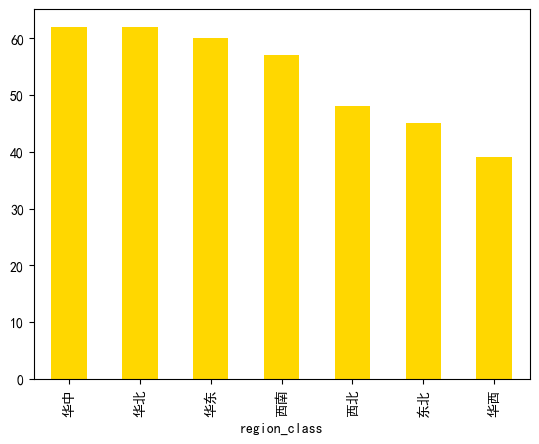

In [22]:

#tourist['gender_class'].value_counts().plot(kind="bar",color='green')
#tourist['thotel_class'].value_counts().plot(kind="bar",color='orange')
#tourist['type3_class'].value_counts().plot(kind="bar",color='pink')
#tourist['type2_class'].value_counts().plot(kind="bar",color='lightblue')
tourist['region_class'].value_counts().plot(kind="bar",color='gold')


## 1.4 compute variables 计算变量

### 1.4.1 计算变量：示例

计算变量，compute variables与recode是两个思路，但是有时可以互相替换。

<Axes: xlabel='sat'>

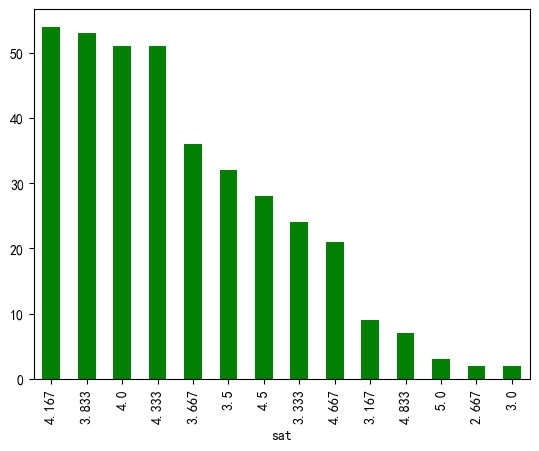

In [23]:
#计算总体满意度sat
# 方法1：平均数公式——好理解，但是不推荐
tourist['sat'] = ((tourist['sat1'] + tourist['sat2'] + tourist['sat3'] + tourist['sat4'] + tourist['sat5'] + tourist['sat6'])/6).round(3)

# 方法2：loc处理
# .mean(axis=1)是计算各行（指定列）的平均值
# .round(3)保留小数点后3位有效数字
tourist['sat']=tourist.loc[:, ['sat1','sat2','sat3','sat4','sat5','sat6']].mean(axis=1).round(3)

# 方法3：iloc处理
# 使用iloc需要提供列的序号
#tourist['sat_new']=tourist.iloc[:, [8,9,10,11,12,13]].mean(axis=1).round(3)


tourist['sat'].value_counts().plot(kind="bar",color='green')


### 1.4.2 练习3 计算变量

In [24]:
#compute variables
# 练习3 ： 基于byear（出生年份），计算age变量（年龄）。
# 2023- byear





<Axes: xlabel='age'>

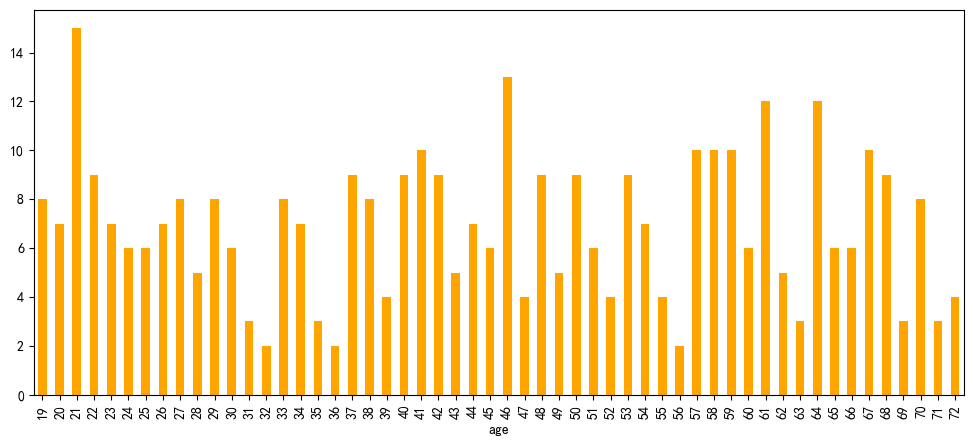

In [25]:
#练习3答案
#练习3 ： 基于byear（出生年份），计算age变量（年龄）。
tourist['age'] = 2024 - tourist['byear']

# 此处的柱状图有两个新的处理
# figsize设置了画布的尺寸，默认的太小，导致横轴的数值“挤在一起”，有重叠，看不清楚
# .sort_index()就是改变了.value_counts()的排序方式，根据年龄排序，而不是根据年龄的频数排序，这样能看出年龄的范围，年龄的分布
tourist['age'].value_counts().sort_index().plot(kind="bar",figsize=(12,5),color='orange')




## 1.5删除变量

In [26]:
tourist['sat_new']=tourist.loc[:, ['sat1','sat2','sat3','sat4','sat5','sat6']].mean(axis=1)
tourist.head()

gender  byear  region  income  expense  type3  type2  thotel  sat1  \
sid                                                                          
rec001       1   1971       1    2708      432      3      2       3     4   
rec002       1   1995       1    1884      238      2      1       3     5   
rec003       1   1990       2    2458      399      3      2       3     3   
rec004       2   1970       2    2726      245      2      1       1     5   
rec005       1   1964       4    3084      287      2      2       2     5   

        sat2  sat3  sat4  sat5  sat6  ri1  ri2  ri3  ri4  ri5  rp1  rp2  rp3  \
sid                                                                            
rec001     2     2     3     4     4    4    4    4    5    4    4    5    4   
rec002     5     4     5     3     5    4    3    4    4    5    4    3    4   
rec003     4     5     3     3     2    5    5    5    5    5    5    5    4   
rec004     2     3     5     4     4    4    5    5    5    5    4    5    5   
rec005     3     5     2     4     5    5    5    5    5    5    5    5    5   

        rp4  rp5  te1  te2  te3  te4  te5  te6  te7  te8  zh1  zh2  zh3  zh4  \
sid                                                                            
rec001    5    4    4    4    4    4    4    4    4    4    3    1    1    2   
rec002    4    5    5    5    4    4    4    5    3    4    4    4    5    3   
rec003    5    5    3    4    4    4    4    4    4    4    1    1    2    2   
rec004    5    5    4    4    4    4    5    4    2    4    3    3    3    3   
rec005    5    5    4    5    4    4    5    5    4    5    1    1    1    4   

        zh5  zh6  zh7  latitude  longitude gender_class thotel_class  \
sid                                                                    
rec001    3    2    2  31.24039  121.66525            男           民宿   
rec002    5    5    5  31.20866  121.46039            男           民宿   
rec003    1    3    1  31.10409  121.39581            男           民宿   
rec004    2    2    2  31.06726  121.16962            女        经济型酒店   
rec005    2    1    1  31.17709  121.67953            男        豪华型酒店   

       type3_class type2_class region_class    sat  age   sat_new  
sid                                                                
rec001     自然与历史混合         参与型           华中  3.167   53  3.166667  
rec002        历史文化         观赏型           华中  4.500   29  4.500000  
rec003     自然与历史混合         参与型           华东  3.333   34  3.333333  
rec004        历史文化         观赏型           华东  3.833   54  3.833333  
rec005        历史文化         参与型           东北  4.000   60  4.000000

In [27]:
del tourist['sat_new']
tourist.head()

gender  byear  region  income  expense  type3  type2  thotel  sat1  \
sid                                                                          
rec001       1   1971       1    2708      432      3      2       3     4   
rec002       1   1995       1    1884      238      2      1       3     5   
rec003       1   1990       2    2458      399      3      2       3     3   
rec004       2   1970       2    2726      245      2      1       1     5   
rec005       1   1964       4    3084      287      2      2       2     5   

        sat2  sat3  sat4  sat5  sat6  ri1  ri2  ri3  ri4  ri5  rp1  rp2  rp3  \
sid                                                                            
rec001     2     2     3     4     4    4    4    4    5    4    4    5    4   
rec002     5     4     5     3     5    4    3    4    4    5    4    3    4   
rec003     4     5     3     3     2    5    5    5    5    5    5    5    4   
rec004     2     3     5     4     4    4    5    5    5    5    4    5    5   
rec005     3     5     2     4     5    5    5    5    5    5    5    5    5   

        rp4  rp5  te1  te2  te3  te4  te5  te6  te7  te8  zh1  zh2  zh3  zh4  \
sid                                                                            
rec001    5    4    4    4    4    4    4    4    4    4    3    1    1    2   
rec002    4    5    5    5    4    4    4    5    3    4    4    4    5    3   
rec003    5    5    3    4    4    4    4    4    4    4    1    1    2    2   
rec004    5    5    4    4    4    4    5    4    2    4    3    3    3    3   
rec005    5    5    4    5    4    4    5    5    4    5    1    1    1    4   

        zh5  zh6  zh7  latitude  longitude gender_class thotel_class  \
sid                                                                    
rec001    3    2    2  31.24039  121.66525            男           民宿   
rec002    5    5    5  31.20866  121.46039            男           民宿   
rec003    1    3    1  31.10409  121.39581            男           民宿   
rec004    2    2    2  31.06726  121.16962            女        经济型酒店   
rec005    2    1    1  31.17709  121.67953            男        豪华型酒店   

       type3_class type2_class region_class    sat  age  
sid                                                      
rec001     自然与历史混合         参与型           华中  3.167   53  
rec002        历史文化         观赏型           华中  4.500   29  
rec003     自然与历史混合         参与型           华东  3.333   34  
rec004        历史文化         观赏型           华东  3.833   54  
rec005        历史文化         参与型           东北  4.000   60

## 1.6 recode 重新编码

### 1.6.1 recode:收入段

income3
2000-3000    191
3000以上       106
2000以下        76
Name: count, dtype: int64


<Axes: xlabel='income3'>

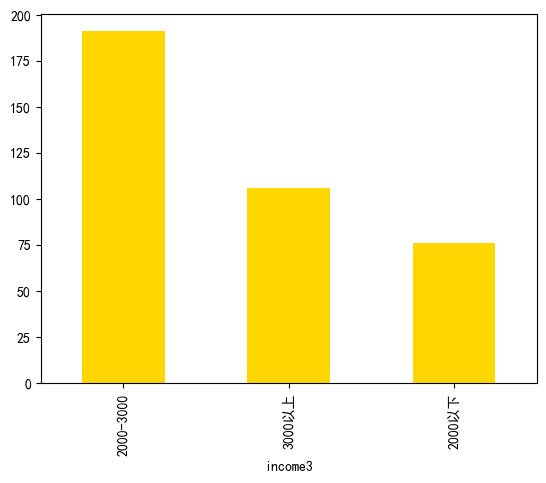

In [28]:
# recode 重新编码：income3收入段变量——分3段

tourist.loc[(tourist['income']< 2000) , 'income3'] = "2000以下"
tourist.loc[((tourist['income']>= 2000) & (tourist['income']< 3000)) , 'income3'] = "2000-3000"
tourist.loc[(tourist['income']>= 3000) , 'income3'] = "3000以上"
print(tourist['income3'].value_counts())
tourist['income3'].value_counts().plot(kind="bar",color='gold')


### 1.6.2 定义函数进行recode

income3new
2000-3000    191
3000以上       106
2000以下        76
Name: count, dtype: int64


<Axes: xlabel='income3new'>

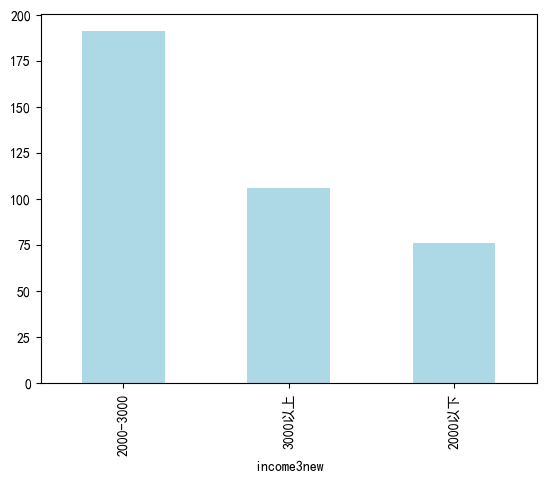

In [29]:
# 第2种方法，定义函数: 分段越多越方便，逻辑也比较清洗，容易检查程序问题
def income_range(x):
    if x['income'] < 2000: return "2000以下" 
    elif x['income'] < 3000: return  "2000-3000"
    else: return "3000以上"
    
    

tourist['income3new'] = tourist.apply(income_range, axis=1)
print(tourist['income3new'].value_counts())
tourist['income3new'].value_counts().plot(kind="bar",color='lightblue')

In [30]:
tourist.head()
del tourist['income3new']

### 1.6.3 练习4 recode

In [31]:
#compute variables
# 练习4 ： 把收入变量income分为5段，2000以下，2000-2499，2500-2999，3000-3499，3500以上





income5
2500-2999    111
2000-2499     80
2000以下        76
3000-3499     72
3500以上        34
Name: count, dtype: int64


<Axes: xlabel='income5'>

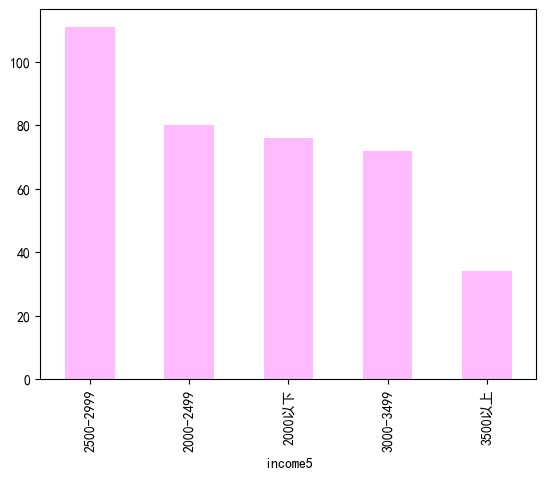

In [32]:
# 练习4答案
# 练习4 ： 把收入变量income分为5段，2000以下，2000-2499，2500-2999，3000-3499，3500以上

def income_range(x):
    if x['income'] < 2000: return "2000以下" 
    elif x['income'] < 2500: return  "2000-2499"
    elif x['income'] < 3000: return  "2500-2999"
    elif x['income'] < 3500: return  "3000-3499"
    else: return "3500以上"
    
    

tourist['income5'] = tourist.apply(income_range, axis=1)
print(tourist['income5'].value_counts())
tourist['income5'].value_counts().plot(kind="bar",color='#FFBBFF')



### 1.6.4 recode:旅游支出分段

expense3
300以下      152
300-399    144
400以上       77
Name: count, dtype: int64


<Axes: xlabel='expense3'>

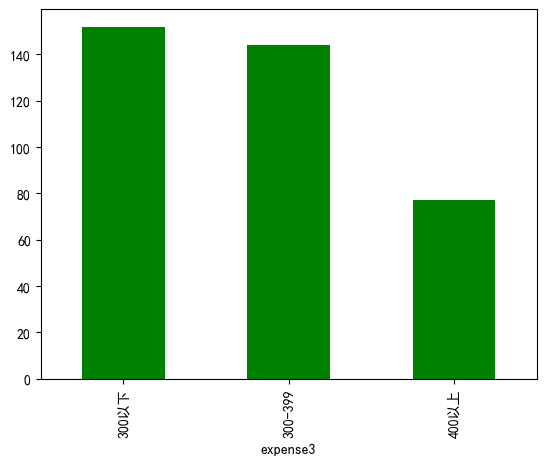

In [33]:

def expense_range(x):
    if x['expense'] < 300: return "300以下" 
    elif x['expense'] < 400: return  "300-399"
    else: return "400以上"
    
    

tourist['expense3'] = tourist.apply(expense_range, axis=1)
print(tourist['expense3'].value_counts())
tourist['expense3'].value_counts().plot(kind="bar",color='green')



## 1.6 summary()

快速浏览、汇总（最大值、最小值、数据类型、变量值标签） 有利于发现异常值

In [24]:
tourist.describe()

gender        byear      region       income     expense  \
count  373.000000   373.000000  373.000000   373.000000  373.000000   
mean     1.426273  1978.882038    3.761394  2589.630027  330.635389   
std      0.495199    15.705523    1.985000   658.011641   81.296722   
min      1.000000  1952.000000    1.000000  1133.000000  199.000000   
25%      1.000000  1965.000000    2.000000  2121.000000  262.000000   
50%      1.000000  1978.000000    4.000000  2654.000000  326.000000   
75%      2.000000  1993.000000    6.000000  3084.000000  391.000000   
max      2.000000  2005.000000    7.000000  3773.000000  556.000000   

            type3       type2      thotel        sat1        sat2        sat3  \
count  373.000000  373.000000  373.000000  373.000000  373.000000  373.000000   
mean     2.335121    1.522788    2.176944    4.348525    3.742627    3.675603   
std      0.731602    0.500151    1.145728    0.745401    1.071744    1.191082   
min      1.000000    1.000000    1.000000    3.000000    2.000000    1.000000   
25%      2.000000    1.000000    1.000000    4.000000    3.000000    3.000000   
50%      2.000000    2.000000    2.000000    5.000000    4.000000    4.000000   
75%      3.000000    2.000000    3.000000    5.000000    5.000000    5.000000   
max      3.000000    2.000000    4.000000    5.000000    5.000000    5.000000   

             sat4        sat5        sat6         ri1         ri2         ri3  \
count  373.000000  373.000000  373.000000  373.000000  373.000000  373.000000   
mean     4.214477    4.096515    3.887399    4.351206    4.490617    4.498660   
std      0.911164    0.787205    1.043761    0.637097    0.654219    0.607412   
min      2.000000    3.000000    2.000000    3.000000    3.000000    3.000000   
25%      4.000000    3.000000    3.000000    4.000000    4.000000    4.000000   
50%      4.000000    4.000000    4.000000    4.000000    5.000000    5.000000   
75%      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

              ri4         ri5         rp1         rp2         rp3        rp4  \
count  373.000000  373.000000  373.000000  373.000000  373.000000  373.00000   
mean     4.707775    4.726542    4.316354    4.514745    4.383378    4.72118   
std      0.620327    0.572927    0.677341    0.641673    0.726194    0.60242   
min      3.000000    3.000000    3.000000    3.000000    2.000000    3.00000   
25%      5.000000    5.000000    4.000000    4.000000    4.000000    5.00000   
50%      5.000000    5.000000    4.000000    5.000000    5.000000    5.00000   
75%      5.000000    5.000000    5.000000    5.000000    5.000000    5.00000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.00000   

              rp5         te1         te2         te3         te4         te5  \
count  373.000000  373.000000  373.000000  373.000000  373.000000  373.000000   
mean     4.643432    3.911528    3.790885    4.131367    4.077748    3.756032   
std      0.629850    0.964533    1.026123    0.868448    0.887102    0.940143   
min      3.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    4.000000    3.000000    4.000000    4.000000    3.000000   
50%      5.000000    4.000000    4.000000    4.000000    4.000000    4.000000   
75%      5.000000    5.000000    4.000000    5.000000    5.000000    4.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

              te6         te7         te8         zh1         zh2         zh3  \
count  373.000000  373.000000  373.000000  373.000000  373.000000  373.000000   
mean     3.898123    3.729223    3.656836    2.836461    2.627346    2.702413   
std      1.065249    1.026073    0.986570    1.285804    1.314928    1.321827   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      3.000000    3.000000    3.000000    2.000000  

## 1.7 数据的分布情况

数据分布对于统计方法选择，统计检验非常重要
为了提高运行效率，使用R默认的绘图工具，没有用ggplot2

### 1.7.1 数据分布：示例

Text(0.5, 1.0, 'zh1')

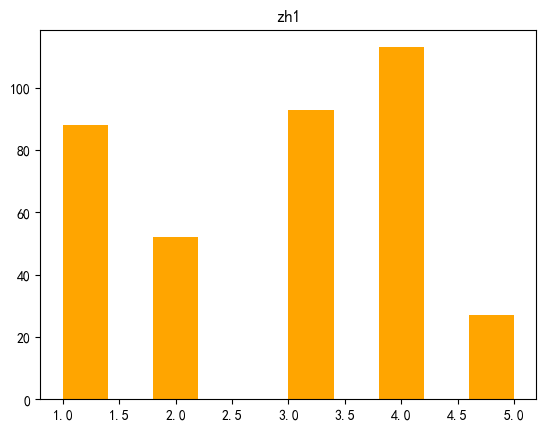

In [34]:
plt.hist(tourist['zh1'].values, color="orange")
plt.title(tourist['zh1'].name)


### 1.7.2 练习5 数据分布

In [109]:
#查看概率分布
# 练习5 ： 查看收入变量income的分布。



Text(0.5, 1.0, 'income')

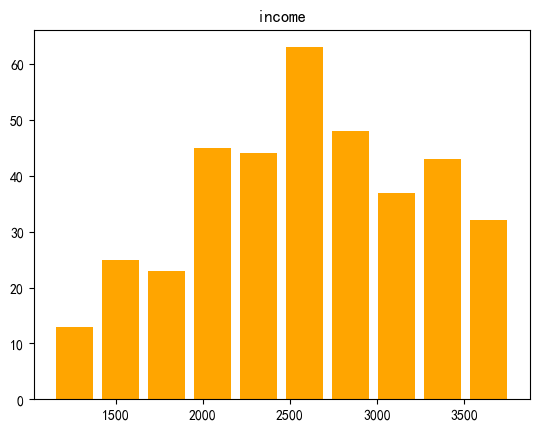

In [35]:
# 练习5答案
# 练习5 ： 查看收入变量income的分布。
plt.hist(tourist['income'].values,rwidth=0.8, color="orange")
plt.title(tourist['income'].name)

### 1.7.3 用循环语句查看多个变量的分布：柱形图

程序设计可以提高批处理的效率，但是我们不做要求，感兴趣同学自己研究一下

In [183]:
# numeric_features=[x for x in tourist.columns if tourist[x].dtype!="object"]
# taking only the numeric columns from the dataframe.

#for i in tourist[numeric_features].columns:
   # plt.figure(figsize=(5,5))
   # plt.title(i)
   # plt.hist(tourist[i],rwidth=0.8, color="orange")
   # plt.savefig(datafolder+tourist[i].name+'_distribution.png')


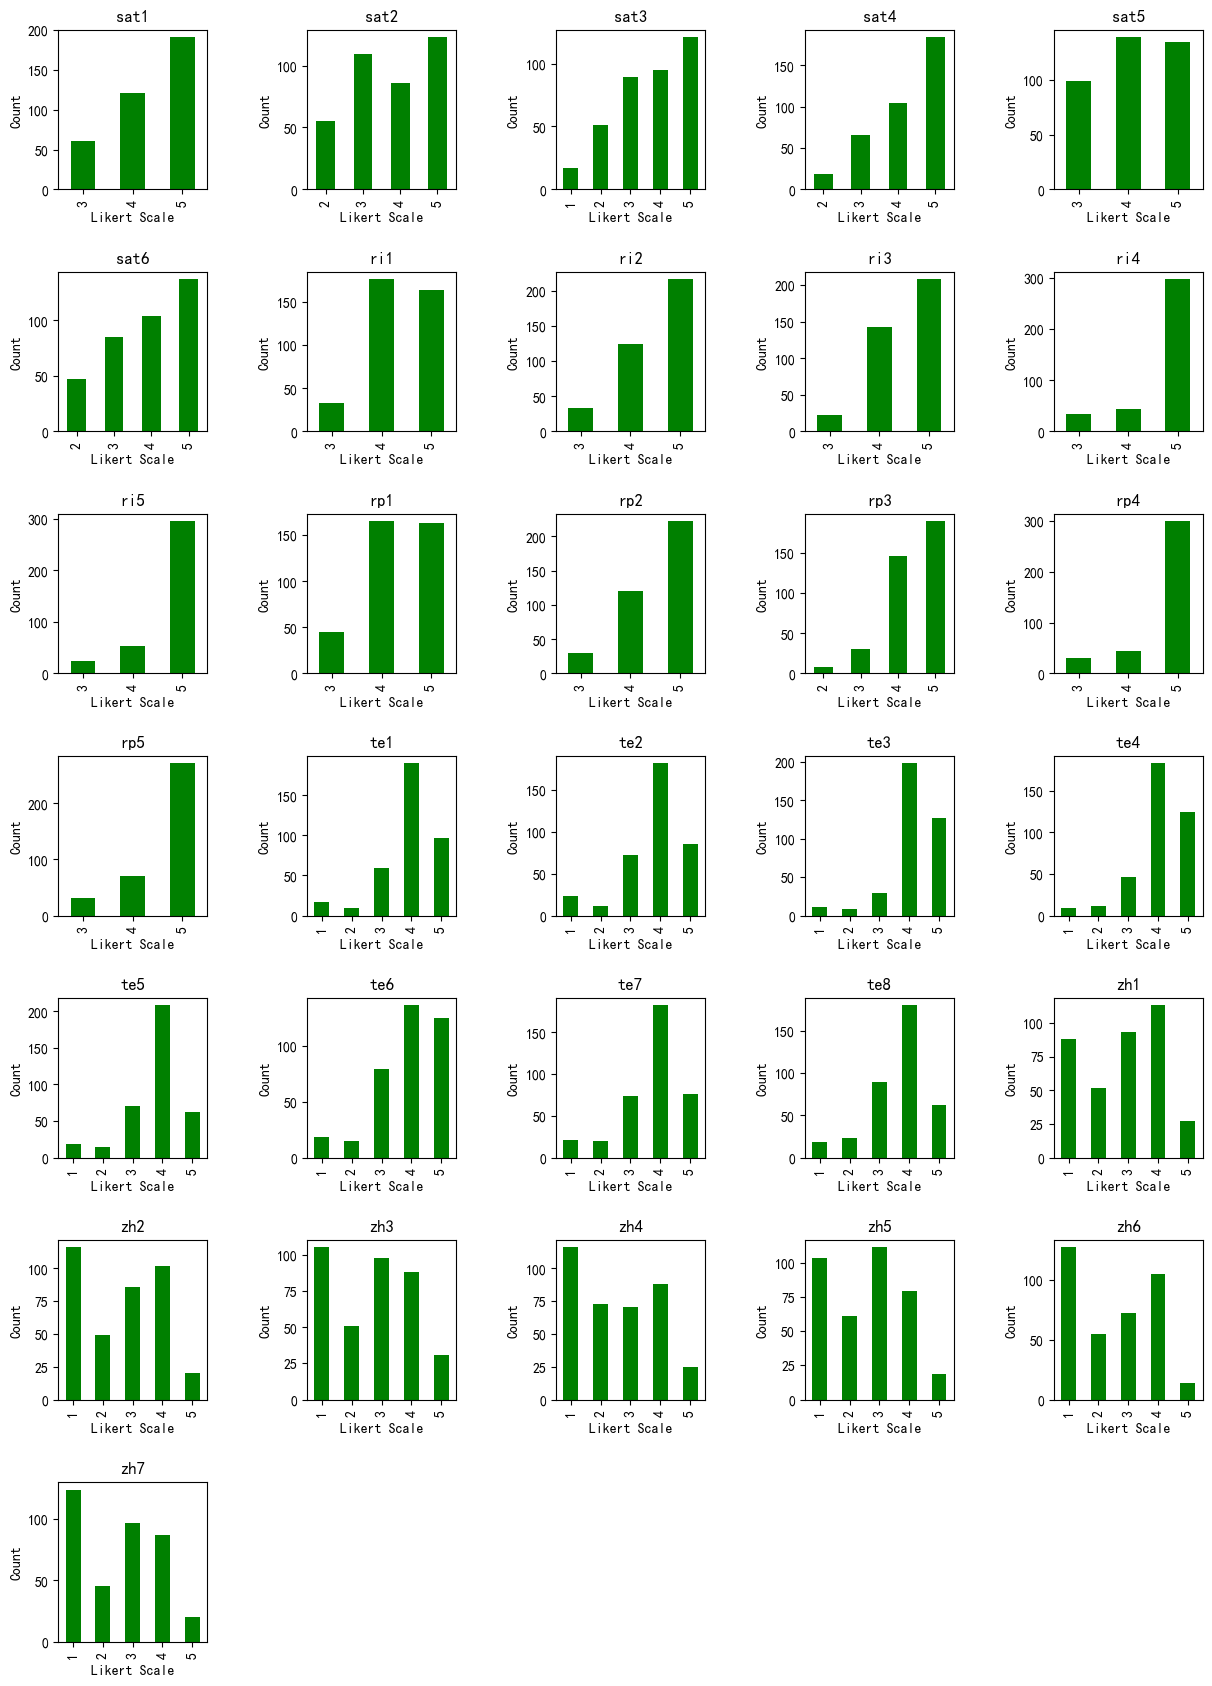

In [53]:


# 提取检测数据分布的量表数据集
likert_columns = tourist.columns[8:39]  # Selecting columns from 6 to 45

# 每行5张图
num_cols_per_row = 5
num_rows = (len(likert_columns) + num_cols_per_row - 1) // num_cols_per_row

fig, axs = plt.subplots(num_rows, num_cols_per_row, figsize=(13, num_rows * 2.5))
fig.tight_layout(pad=4.0)

# Loop over the columns to create subplots
for idx, col in enumerate(likert_columns):
    row = idx // num_cols_per_row
    col_pos = idx % num_cols_per_row
    ax = axs[row, col_pos]
    
    # Plotting the distribution of each Likert scale variable
    value_counts = tourist[col].value_counts().sort_index()
    value_counts.plot(kind='bar', color='green', ax=ax)
    
    # Setting the title to the variable name
    ax.set_title(col)
    ax.set_xlabel('Likert Scale')
    ax.set_ylabel('Count')

# Hide any empty subplots (if total number of variables is not a multiple of 5)
for i in range(len(likert_columns), num_rows * num_cols_per_row):
    fig.delaxes(axs.flat[i])

# 3.保存图片
plt.savefig(datafolder+'3likert_scales_distribution.png')

# 4.显示
plt.show()


## 1.8 save dataset

保存为feather格式数据，以后可以反复调用，注意从2.开始，不用把1.部分重复一遍。

In [54]:
tourist=tourist.reset_index()
tourist.head(5)

sid  gender  byear  region  income  expense  type3  type2  thotel  sat1  \
0  rec001       1   1971       1    2708      432      3      2       3     4   
1  rec002       1   1995       1    1884      238      2      1       3     5   
2  rec003       1   1990       2    2458      399      3      2       3     3   
3  rec004       2   1970       2    2726      245      2      1       1     5   
4  rec005       1   1964       4    3084      287      2      2       2     5   

   sat2  sat3  sat4  sat5  sat6  ri1  ri2  ri3  ri4  ri5  rp1  rp2  rp3  rp4  \
0     2     2     3     4     4    4    4    4    5    4    4    5    4    5   
1     5     4     5     3     5    4    3    4    4    5    4    3    4    4   
2     4     5     3     3     2    5    5    5    5    5    5    5    4    5   
3     2     3     5     4     4    4    5    5    5    5    4    5    5    5   
4     3     5     2     4     5    5    5    5    5    5    5    5    5    5   

   rp5  te1  te2  te3  te4  te5  te6  te7  te8  zh1  zh2  zh3  zh4  zh5  zh6  \
0    4    4    4    4    4    4    4    4    4    3    1    1    2    3    2   
1    5    5    5    4    4    4    5    3    4    4    4    5    3    5    5   
2    5    3    4    4    4    4    4    4    4    1    1    2    2    1    3   
3    5    4    4    4    4    5    4    2    4    3    3    3    3    2    2   
4    5    4    5    4    4    5    5    4    5    1    1    1    4    2    1   

   zh7  latitude  longitude gender_class thotel_class type3_class type2_class  \
0    2  31.24039  121.66525            男           民宿     自然与历史混合         参与型   
1    5  31.20866  121.46039            男           民宿        历史文化         观赏型   
2    1  31.10409  121.39581            男           民宿     自然与历史混合         参与型   
3    2  31.06726  121.16962            女        经济型酒店        历史文化         观赏型   
4    1  31.17709  121.67953            男        豪华型酒店        历史文化         参与型   

  region_class    sat  age    income3    income5 expense3  
0           华中  3.167   53  2000-3000  2500-2999    400以上  
1           华中  4.500   29     2000以下     2000以下    300以下  
2           华东  3.333   34  2000-3000  2000-2499  300-399  
3           华东  3.833   54  2000-3000  2500-2999    300以下  
4           东北  4.000   60     3000以上  3000-3499    300以下

In [55]:
tourist.to_feather(datafolder+'tourist.feather')

In [56]:
#输出为csv文件

tourist.to_csv(datafolder+'tourist_python.csv',encoding = "GBK")

# 2. basic analysis基础分析

In [75]:
#-*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

import researchpy as rp
import scipy.stats as stats


In [76]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

# 显示所有行，所有列
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [77]:

#设定工作文件夹, 根据自己电脑的情况进行修改
datafolder='D:/tdata/tourist_CN_python/'



load是用于载入保存了的feather格式数据

In [59]:
tourist=pd.read_feather(datafolder+'tourist.feather')

In [60]:
tourist.dtypes

sid              object
gender            int64
byear             int64
region            int64
income            int64
expense           int64
type3             int64
type2             int64
thotel            int64
sat1              int64
sat2              int64
sat3              int64
sat4              int64
sat5              int64
sat6              int64
ri1               int64
ri2               int64
ri3               int64
ri4               int64
ri5               int64
rp1               int64
rp2               int64
rp3               int64
rp4               int64
rp5               int64
te1               int64
te2               int64
te3               int64
te4               int64
te5               int64
te6               int64
te7               int64
te8               int64
zh1               int64
zh2               int64
zh3               int64
zh4               int64
zh5               int64
zh6               int64
zh7               int64
latitude        float64
longitude       

In [61]:
tourist.shape

(373, 52)

In [62]:
tourist.head()

sid  gender  byear  region  income  expense  type3  type2  thotel  sat1  \
0  rec001       1   1971       1    2708      432      3      2       3     4   
1  rec002       1   1995       1    1884      238      2      1       3     5   
2  rec003       1   1990       2    2458      399      3      2       3     3   
3  rec004       2   1970       2    2726      245      2      1       1     5   
4  rec005       1   1964       4    3084      287      2      2       2     5   

   sat2  sat3  sat4  sat5  sat6  ri1  ri2  ri3  ri4  ri5  rp1  rp2  rp3  rp4  \
0     2     2     3     4     4    4    4    4    5    4    4    5    4    5   
1     5     4     5     3     5    4    3    4    4    5    4    3    4    4   
2     4     5     3     3     2    5    5    5    5    5    5    5    4    5   
3     2     3     5     4     4    4    5    5    5    5    4    5    5    5   
4     3     5     2     4     5    5    5    5    5    5    5    5    5    5   

   rp5  te1  te2  te3  te4  te5  te6  te7  te8  zh1  zh2  zh3  zh4  zh5  zh6  \
0    4    4    4    4    4    4    4    4    4    3    1    1    2    3    2   
1    5    5    5    4    4    4    5    3    4    4    4    5    3    5    5   
2    5    3    4    4    4    4    4    4    4    1    1    2    2    1    3   
3    5    4    4    4    4    5    4    2    4    3    3    3    3    2    2   
4    5    4    5    4    4    5    5    4    5    1    1    1    4    2    1   

   zh7  latitude  longitude gender_class thotel_class type3_class type2_class  \
0    2  31.24039  121.66525            男           民宿     自然与历史混合         参与型   
1    5  31.20866  121.46039            男           民宿        历史文化         观赏型   
2    1  31.10409  121.39581            男           民宿     自然与历史混合         参与型   
3    2  31.06726  121.16962            女        经济型酒店        历史文化         观赏型   
4    1  31.17709  121.67953            男        豪华型酒店        历史文化         参与型   

  region_class    sat  age    income3    income5 expense3  
0           华中  3.167   53  2000-3000  2500-2999    400以上  
1           华中  4.500   29     2000以下     2000以下    300以下  
2           华东  3.333   34  2000-3000  2000-2499  300-399  
3           华东  3.833   54  2000-3000  2500-2999    300以下  
4           东北  4.000   60     3000以上  3000-3499    300以下

## 2.1 frequency analysis频数分析



In [68]:
#性别的频数表
Freq_gender=tourist['gender_class'].value_counts()


#性别的百分比
percent=tourist['gender_class'].value_counts(normalize=True) * 100
percent=percent.round(3)

#合并
Freq_gender= pd.concat([Freq_gender, percent], axis=1)

# 重命名变量名
Freq_gender = Freq_gender.reset_index()
Freq_gender.columns = ['gender','Freq','Percent']

#输出为csv文件

Freq_gender.to_csv(datafolder+'Freq_gender.csv',encoding = "GBK")

# 输出为excel文件
Freq_gender.to_excel(datafolder + 'Freq_gender.xlsx', engine='openpyxl', index=False)

Freq_gender

gender  Freq  Percent
0      男   214   57.373
1      女   159   42.627

In [65]:
type(Freq_gender)

pandas.core.frame.DataFrame

In [67]:
#频数表
Freq_hotel=tourist['thotel_class'].value_counts()


#百分比
percent=tourist['thotel_class'].value_counts(normalize=True) * 100
percent=percent.round(3)

#合并
Freq_hotel= pd.concat([Freq_hotel, percent], axis=1)

# 重命名变量名
Freq_hotel = Freq_hotel.reset_index()
Freq_hotel.columns = ['hotel','Freq','Percent']

#输出为csv文件

Freq_hotel.to_csv(datafolder+'Freq_hotel.csv',encoding = "GBK")
# 输出为excel文件
Freq_hotel.to_excel(datafolder + 'Freq_hotel.xlsx', engine='openpyxl', index=False)
Freq_hotel

hotel  Freq  Percent
0  经济型酒店   163   43.700
1     民宿   121   32.440
2  酒店式公寓    54   14.477
3  豪华型酒店    35    9.383

### 2.1.1 练习6 :频数分析

In [69]:
##### 练习6 ： 对region变量，进行频数分析。
#区域的频数表






In [70]:
##### 练习6答案 ： 对region变量，进行频数分析。

#频数表
Freq_region=tourist['region_class'].value_counts()


#百分比
percent=tourist['region_class'].value_counts(normalize=True) * 100
percent=percent.round(3)

#合并
Freq_region= pd.concat([Freq_region, percent], axis=1)

# 重命名变量名
Freq_region = Freq_region.reset_index()
Freq_region.columns = ['region','Freq','Percent']

#输出为csv文件

Freq_region.to_excel(datafolder + 'Freq_region.xlsx', engine='openpyxl', index=False)

Freq_region


region  Freq  Percent
0     华中    62   16.622
1     华北    62   16.622
2     华东    60   16.086
3     西南    57   15.282
4     西北    48   12.869
5     东北    45   12.064
6     华西    39   10.456

### 2.1.2 连续变量的柱形图

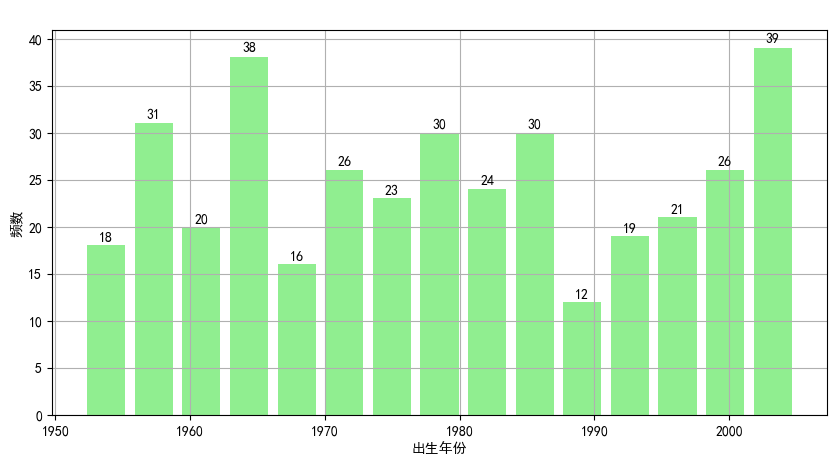

In [72]:
# html color codes
# https://html-color.codes/
# r colors names
# https://r-charts.com/colors/

# 1.创建画布
plt.figure(figsize=(10, 5))

# 2.绘制图像
n, bins, patches = plt.hist(tourist['byear'].values, bins=15,rwidth=0.8,color="lightgreen")
# n 为 各个bin里面的计数; bins 为 bin 的边界值组成的 列表; patches 为 图形

# 2.0 在每个条柱上标注数量
for i in range(len(n)):
        plt.text(bins[i]+(bins[1]-bins[0])/2, n[i]*1.01, int(n[i]), ha='center', va= 'bottom')
        
# 2.1 添加刻度
min_1 = tourist['byear'].min()
max_1 = tourist['byear'].max()

#t1 = np.linspace(min_1, max_1, num=11)

#plt.xticks(t1)

# 2.2 添加网格和标题
plt.grid()
plt.title(" ")
plt.xlabel("出生年份")
plt.ylabel("频数")



# 3.保存图片
plt.savefig(datafolder+'4birthyear_distribution.png')

# 4.显示
plt.show()

### 2.1.3 练习7 age4的频数分析

In [73]:

#### 综合一点的练习

##### 练习7 ： 
##### step1 参考1.4 根据byear，计算生成年龄变量age
##### step2 参考1.7 查看年龄变量age的分布
##### step3 参考1.5 把连续变量age，转换为年龄段变量，例如age4（20岁以下，20-40，40-60，60岁以上）
##### step4 参考2.1 对age4变量进行频数分析



练习7的答案

In [74]:
# 练习7 答案





## 2.2 卡方检验chi-square test



主要参考网址<p>
https://www.pythonfordatascience.org/chi-square-test-of-independence-python/
<p>
卡方独立性检验用于检测分类变量之间的依赖性，是一种全面性检验。这意味着，如果发现显著的关系，并且希望检测不同组之间的差异，则需要进行事后检验。通常情况下，作为事后检验会使用比例检验。

卡方检验（Chi-Square Test）


$$
\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}
$$

参数解释
- $\chi^2$ 是卡方统计量。
- $O_i$ 是第 $i$ 个类别的观察频数（实际观察值）。
- $E_i$ 是第 $i$ 个类别的期望频数（理论期望值）。
- 求和是对所有可能的类别进行。

卡方检验是一种统计方法，用于比较观察频数和期望频数之间的差异，进而判断不同分类变量之间是否独立。公式中的 $\chi^2$ 表示卡方值，通过计算每个类别观察值和期望值的差异的平方，除以期望值后的和，来得出卡方统计量。这个统计量越大，表示观察值与期望值之间的差异越大，变量间的独立性越低。


### 2.2.1 列联表crosstable

In [78]:
import pandas as pd
import scipy.stats as stats


In [87]:
# Step 1: 生成列联表
ct_thotel_gender=pd.crosstab(tourist['thotel_class'],tourist['gender_class'])
ct_thotel_gender

gender_class   女   男
thotel_class        
民宿            45  76
经济型酒店         75  88
豪华型酒店         13  22
酒店式公寓         26  28

### 2.2.2 使用scipy.stats进行卡方检验

In [88]:


# Step 2: Perform the Chi-square test
stat, p, dof, expected = stats.chi2_contingency(ct_thotel_gender)

# Print the results
print("Pearson Chi-square:", stat)
print("P-value:", p)
print("Degrees of freedom:", dof)


alpha = 0.05

print('p=%.3f' % p)


Pearson Chi-square: 3.329796602261341
P-value: 0.3435169972026326
Degrees of freedom: 3
p=0.344


### 2.2.3 使用researchpy进行卡方检验

In [82]:
import researchpy as rp

In [89]:
crosstab_cell, test_results, expected = rp.crosstab(tourist['thotel_class'],tourist['gender_class'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
crosstab_cell

C:\python311\Lib\site-packages\researchpy\crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Pearson Chi-square ( 3.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = f"Pearson Chi-square ({dof: .1f}) = "


gender_class              
gender_class            女      男    All
thotel_class                           
民宿                  12.06  20.38  32.44
经济型酒店               20.11  23.59   43.7
豪华型酒店                3.49    5.9   9.38
酒店式公寓                6.97   7.51  14.48
All                 42.63  57.37  100.0

In [90]:
test_results

Chi-square test  results
0  Pearson Chi-square ( 3.0) =    3.3298
1                    p-value =    0.3435
2                 Cramer's V =    0.0945

### 2.2.4 计算行百分比

In [91]:
crosstab_row, test_results, expected = rp.crosstab(tourist['thotel_class'],tourist['gender_class'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "row")

crosstab_row

C:\python311\Lib\site-packages\researchpy\crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Pearson Chi-square ( 3.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = f"Pearson Chi-square ({dof: .1f}) = "


gender_class              
gender_class            女      男    All
thotel_class                           
民宿                  37.19  62.81  100.0
经济型酒店               46.01  53.99  100.0
豪华型酒店               37.14  62.86  100.0
酒店式公寓               48.15  51.85  100.0
All                 42.63  57.37  100.0

### 2.2.5 计算列百分比

In [92]:
crosstab_col, test_results, expected = rp.crosstab(tourist['thotel_class'],tourist['gender_class'],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "col")

crosstab_col

C:\python311\Lib\site-packages\researchpy\crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Pearson Chi-square ( 3.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = f"Pearson Chi-square ({dof: .1f}) = "


gender_class                
gender_class            女       男     All
thotel_class                             
民宿                  28.30   35.51   32.44
经济型酒店               47.17   41.12   43.70
豪华型酒店                8.18   10.28    9.38
酒店式公寓               16.35   13.08   14.48
All                100.00  100.00  100.00

### 练习8 卡方检验

In [27]:

##### 练习8 ： 利用2.2的卡方检验，检验如下研究假设
##### H1 收入income3与酒店类型thotel有关




## 2.3 独立样本T检验independent samples T-test

主要参考<p>
https://www.pythonfordatascience.org/independent-samples-t-test-python/

In [93]:
tourist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sid           373 non-null    object 
 1   gender        373 non-null    int64  
 2   byear         373 non-null    int64  
 3   region        373 non-null    int64  
 4   income        373 non-null    int64  
 5   expense       373 non-null    int64  
 6   type3         373 non-null    int64  
 7   type2         373 non-null    int64  
 8   thotel        373 non-null    int64  
 9   sat1          373 non-null    int64  
 10  sat2          373 non-null    int64  
 11  sat3          373 non-null    int64  
 12  sat4          373 non-null    int64  
 13  sat5          373 non-null    int64  
 14  sat6          373 non-null    int64  
 15  ri1           373 non-null    int64  
 16  ri2           373 non-null    int64  
 17  ri3           373 non-null    int64  
 18  ri4           373 non-null    

### 2.3.1 T检验：researchpy

In [94]:
rp.ttest(group1= tourist['sat'][tourist['gender_class'] == '男'], group1_name= "男",
         group2= tourist['sat'][tourist['gender_class'] == '女'], group2_name= "女")


C:\python311\Lib\site-packages\researchpy\ttest.py:301: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '男' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = group1_name
C:\python311\Lib\site-packages\researchpy\ttest.py:460: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Difference (男 - 女) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table2.iloc[0,0] = f"Difference ({group1_name} - {group2_name}) = "


(   Variable      N      Mean        SD        SE  95% Conf.  Interval
 0         男  214.0  3.882402  0.442342  0.030238   3.822798  3.942006
 1         女  159.0  4.144623  0.349913  0.027750   4.089814  4.199431
 2  combined  373.0  3.994180  0.425324  0.022022   3.950876  4.037484,
           Independent t-test   results
 0      Difference (男 - 女) =    -0.2622
 1      Degrees of freedom =   371.0000
 2                       t =    -6.1753
 3   Two side test p value =     0.0000
 4  Difference < 0 p value =     0.0000
 5  Difference > 0 p value =     1.0000
 6               Cohen's d =    -0.6466
 7               Hedge's g =    -0.6453
 8          Glass's delta1 =    -0.5928
 9        Point-Biserial r =    -0.3053)

In [95]:
summary, results = rp.ttest(group1= tourist['sat'][tourist['gender_class'] == '男'], group1_name= "Male",
         group2= tourist['sat'][tourist['gender_class'] == '女'], group2_name= "Female")
print(summary)

   Variable      N      Mean        SD        SE  95% Conf.  Interval
0      Male  214.0  3.882402  0.442342  0.030238   3.822798  3.942006
1    Female  159.0  4.144623  0.349913  0.027750   4.089814  4.199431
2  combined  373.0  3.994180  0.425324  0.022022   3.950876  4.037484


C:\python311\Lib\site-packages\researchpy\ttest.py:301: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Male' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = group1_name
C:\python311\Lib\site-packages\researchpy\ttest.py:460: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Difference (Male - Female) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table2.iloc[0,0] = f"Difference ({group1_name} - {group2_name}) = "


In [96]:
print(results)

              Independent t-test   results
0  Difference (Male - Female) =    -0.2622
1          Degrees of freedom =   371.0000
2                           t =    -6.1753
3       Two side test p value =     0.0000
4      Difference < 0 p value =     0.0000
5      Difference > 0 p value =     1.0000
6                   Cohen's d =    -0.6466
7                   Hedge's g =    -0.6453
8              Glass's delta1 =    -0.5928
9            Point-Biserial r =    -0.3053


### 2.3.2 T检验：scipy.stats

In [97]:
data_male=tourist['sat'][tourist['gender_class'] == '男']
data_female=tourist['sat'][tourist['gender_class'] == '女']


print(stats.ttest_ind(data_male,data_female))
print(tourist.groupby('gender_class')['sat'].mean())


TtestResult(statistic=-6.175333759283968, pvalue=1.7346422112259555e-09, df=371.0)
gender_class
女    4.144623
男    3.882402
Name: sat, dtype: float64


(array([11., 37., 46., 48., 17.]),
 array([3.333, 3.633, 3.933, 4.233, 4.533, 4.833]),
 <BarContainer object of 5 artists>)

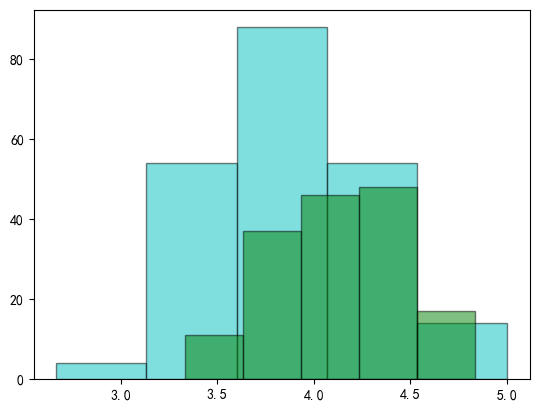

In [98]:
plt.hist(data_male, bins=5, color='c', edgecolor='k', alpha=0.5)
plt.hist(data_female, bins=5, color='g', edgecolor='k', alpha=0.5)

### 2.2.3 多个T检验一起进行

参考程序<p>
https://stackoverflow.com/questions/45015038/how-to-t-test-by-group-in-a-pandas-dataframe

In [99]:
# get a list of all columns in the dataframe without the Group column
#column_list = [x for x in df.columns if x != 'Group']
column_list =['sat1','sat2','sat3','sat4','sat5','sat6']
# create an empty dictionary
t_test_results = {}
t_test_mean={}

# loop over column_list and execute code explained above
for column in column_list:
    group1 = tourist.where(tourist['gender_class'] == '男').dropna()[column]
    group2 = tourist.where(tourist['gender_class'] == '女').dropna()[column]
    # add the output to the dictionary 
    t_test_results[column] = stats.ttest_ind(group1,group2)
    t_test_mean[column] = tourist.groupby('gender_class')[column].mean()
   
results_df = pd.DataFrame.from_dict(t_test_results).T
results_df.columns = ['statistic','p-value']


mean_df = pd.DataFrame.from_dict(t_test_mean).T
mean_df.columns = ['女','男']

#results_df=pd.concat(mean_df,results_df)
print(results_df)
print('\n\n-----------')
print(mean_df)

      statistic   p-value
sat1  -3.211730  0.001435
sat2  -1.854600  0.064447
sat3  -3.348373  0.000896
sat4  -4.713570  0.000003
sat5  -1.418962  0.156750
sat6  -1.396450  0.163414


-----------
             女         男
sat1  4.490566  4.242991
sat2  3.861635  3.654206
sat3  3.911950  3.500000
sat4  4.465409  4.028037
sat5  4.163522  4.046729
sat6  3.974843  3.822430


## 2.4 单因素方差分析 ANOVA



C:\Users\kaiwu\AppData\Local\Temp\ipykernel_17980\26756460.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  n = tourist.groupby('thotel_class').size()[0] #Participants in each condition


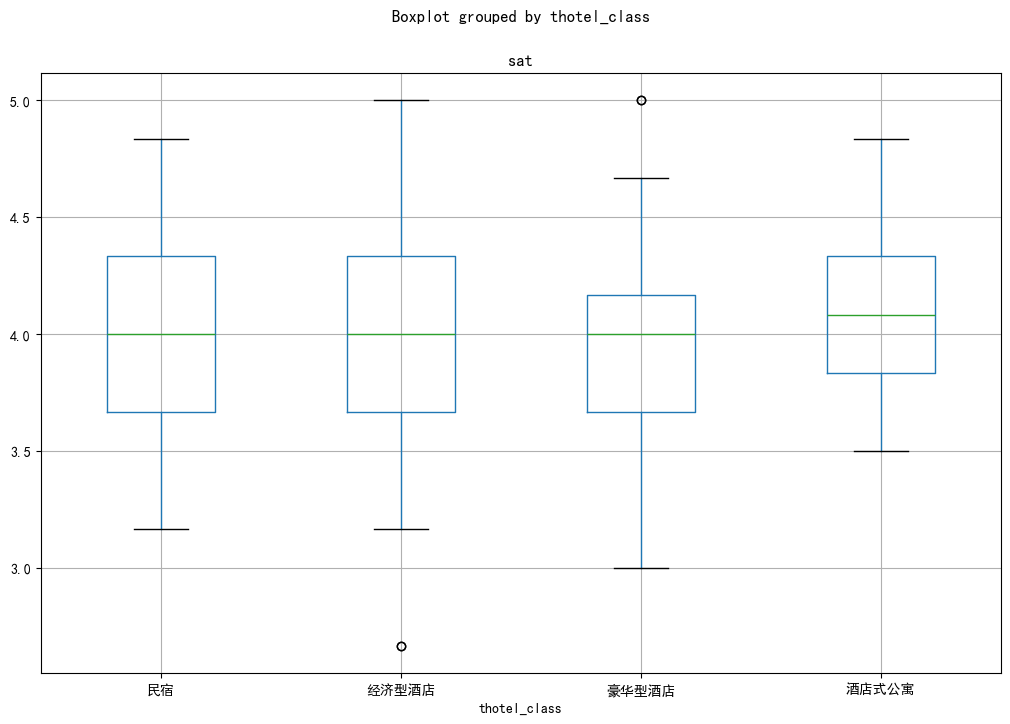

In [100]:
#Create a boxplot
tourist.boxplot('sat', by='thotel_class', figsize=(12, 8))

ctrl = tourist['sat'][tourist.thotel_class == '民宿']

grps = pd.unique(tourist.thotel_class.values)
d_data = {grp:tourist['sat'][tourist.thotel_class == grp] for grp in grps}

k = len(pd.unique(tourist.thotel_class))  # number of conditions
N = len(tourist.values)  # conditions times participants
n = tourist.groupby('thotel_class').size()[0] #Participants in each condition

In [101]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('sat ~ thotel_class',
                data=tourist).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                 sum_sq     df        F    PR(>F)
thotel_class   1.320306    3.0  2.46152  0.062326
Residual      65.974531  369.0      NaN       NaN


In [102]:
print(tourist.groupby('thotel_class')['sat'].mean())

thotel_class
民宿       4.015174
经济型酒店    3.942724
豪华型酒店    3.971429
酒店式公寓    4.117204
Name: sat, dtype: float64


## 2.5 相关分析correlation



<Axes: xlabel='income', ylabel='expense'>

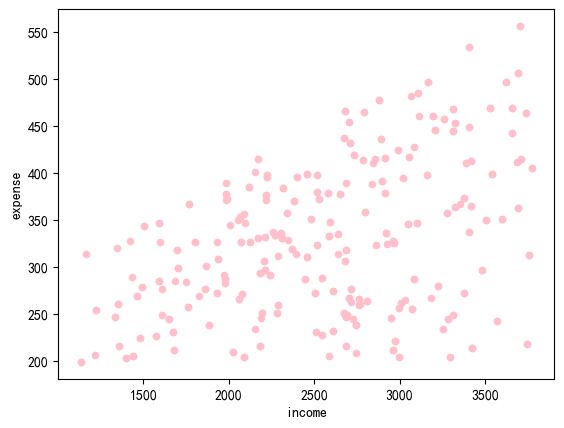

In [103]:
#两个变量关系的散点图
tourist.plot(kind='scatter',x='income',y='expense',color='pink')

### 2.5.1 Pearson's r

In [104]:
stats.pearsonr(tourist['income'], tourist['expense'])    # Pearson's r



PearsonRResult(statistic=0.44294594065424225, pvalue=2.3485878926681604e-19)

### 2.5.2 Spearman's rho

In [105]:

stats.spearmanr(tourist['income'], tourist['expense'])   # Spearman's rho



SignificanceResult(statistic=0.40274488751617243, pvalue=5.601643778810262e-16)

### 2.5.3 Kendall's tau

In [106]:

stats.kendalltau(tourist['income'], tourist['expense'])  # Kendall's tau


SignificanceResult(statistic=0.28461865378435575, pvalue=3.023617258328956e-16)

### 2.5.4 相关系数矩阵

参考网址<p>
https://realpython.com/numpy-scipy-pandas-correlation-python/

相关矩阵数据

In [107]:
test_variables=['income','sat1','sat2','sat3','sat4','sat5','sat6']
corr_data=tourist[test_variables]
#corr_data=tourist.loc[:,['income','sat1','sat2','sat3','sat4','sat5','sat6']]
corr_data.head()

income  sat1  sat2  sat3  sat4  sat5  sat6
0    2708     4     2     2     3     4     4
1    1884     5     5     4     5     3     5
2    2458     3     4     5     3     3     2
3    2726     5     2     3     5     4     4
4    3084     5     3     5     2     4     5

基于numpy计算相关系数矩阵

使用pandas计算相关系数矩阵

In [108]:
# 使用pandas计算相关系数矩阵
corr_matrix=corr_data.corr(method = 'pearson').round(4)

corr_matrix

income    sat1    sat2    sat3    sat4    sat5    sat6
income  1.0000  0.0267 -0.0157 -0.0348  0.0193 -0.0364 -0.0422
sat1    0.0267  1.0000  0.1967  0.1004  0.0440 -0.0392  0.0540
sat2   -0.0157  0.1967  1.0000 -0.0445  0.0649  0.0932 -0.0164
sat3   -0.0348  0.1004 -0.0445  1.0000  0.0469  0.0994 -0.1116
sat4    0.0193  0.0440  0.0649  0.0469  1.0000 -0.0926  0.1074
sat5   -0.0364 -0.0392  0.0932  0.0994 -0.0926  1.0000  0.0263
sat6   -0.0422  0.0540 -0.0164 -0.1116  0.1074  0.0263  1.0000

相关系数矩阵图

参考网址：<p>
https://www.geeksforgeeks.org/exploring-correlation-in-python/

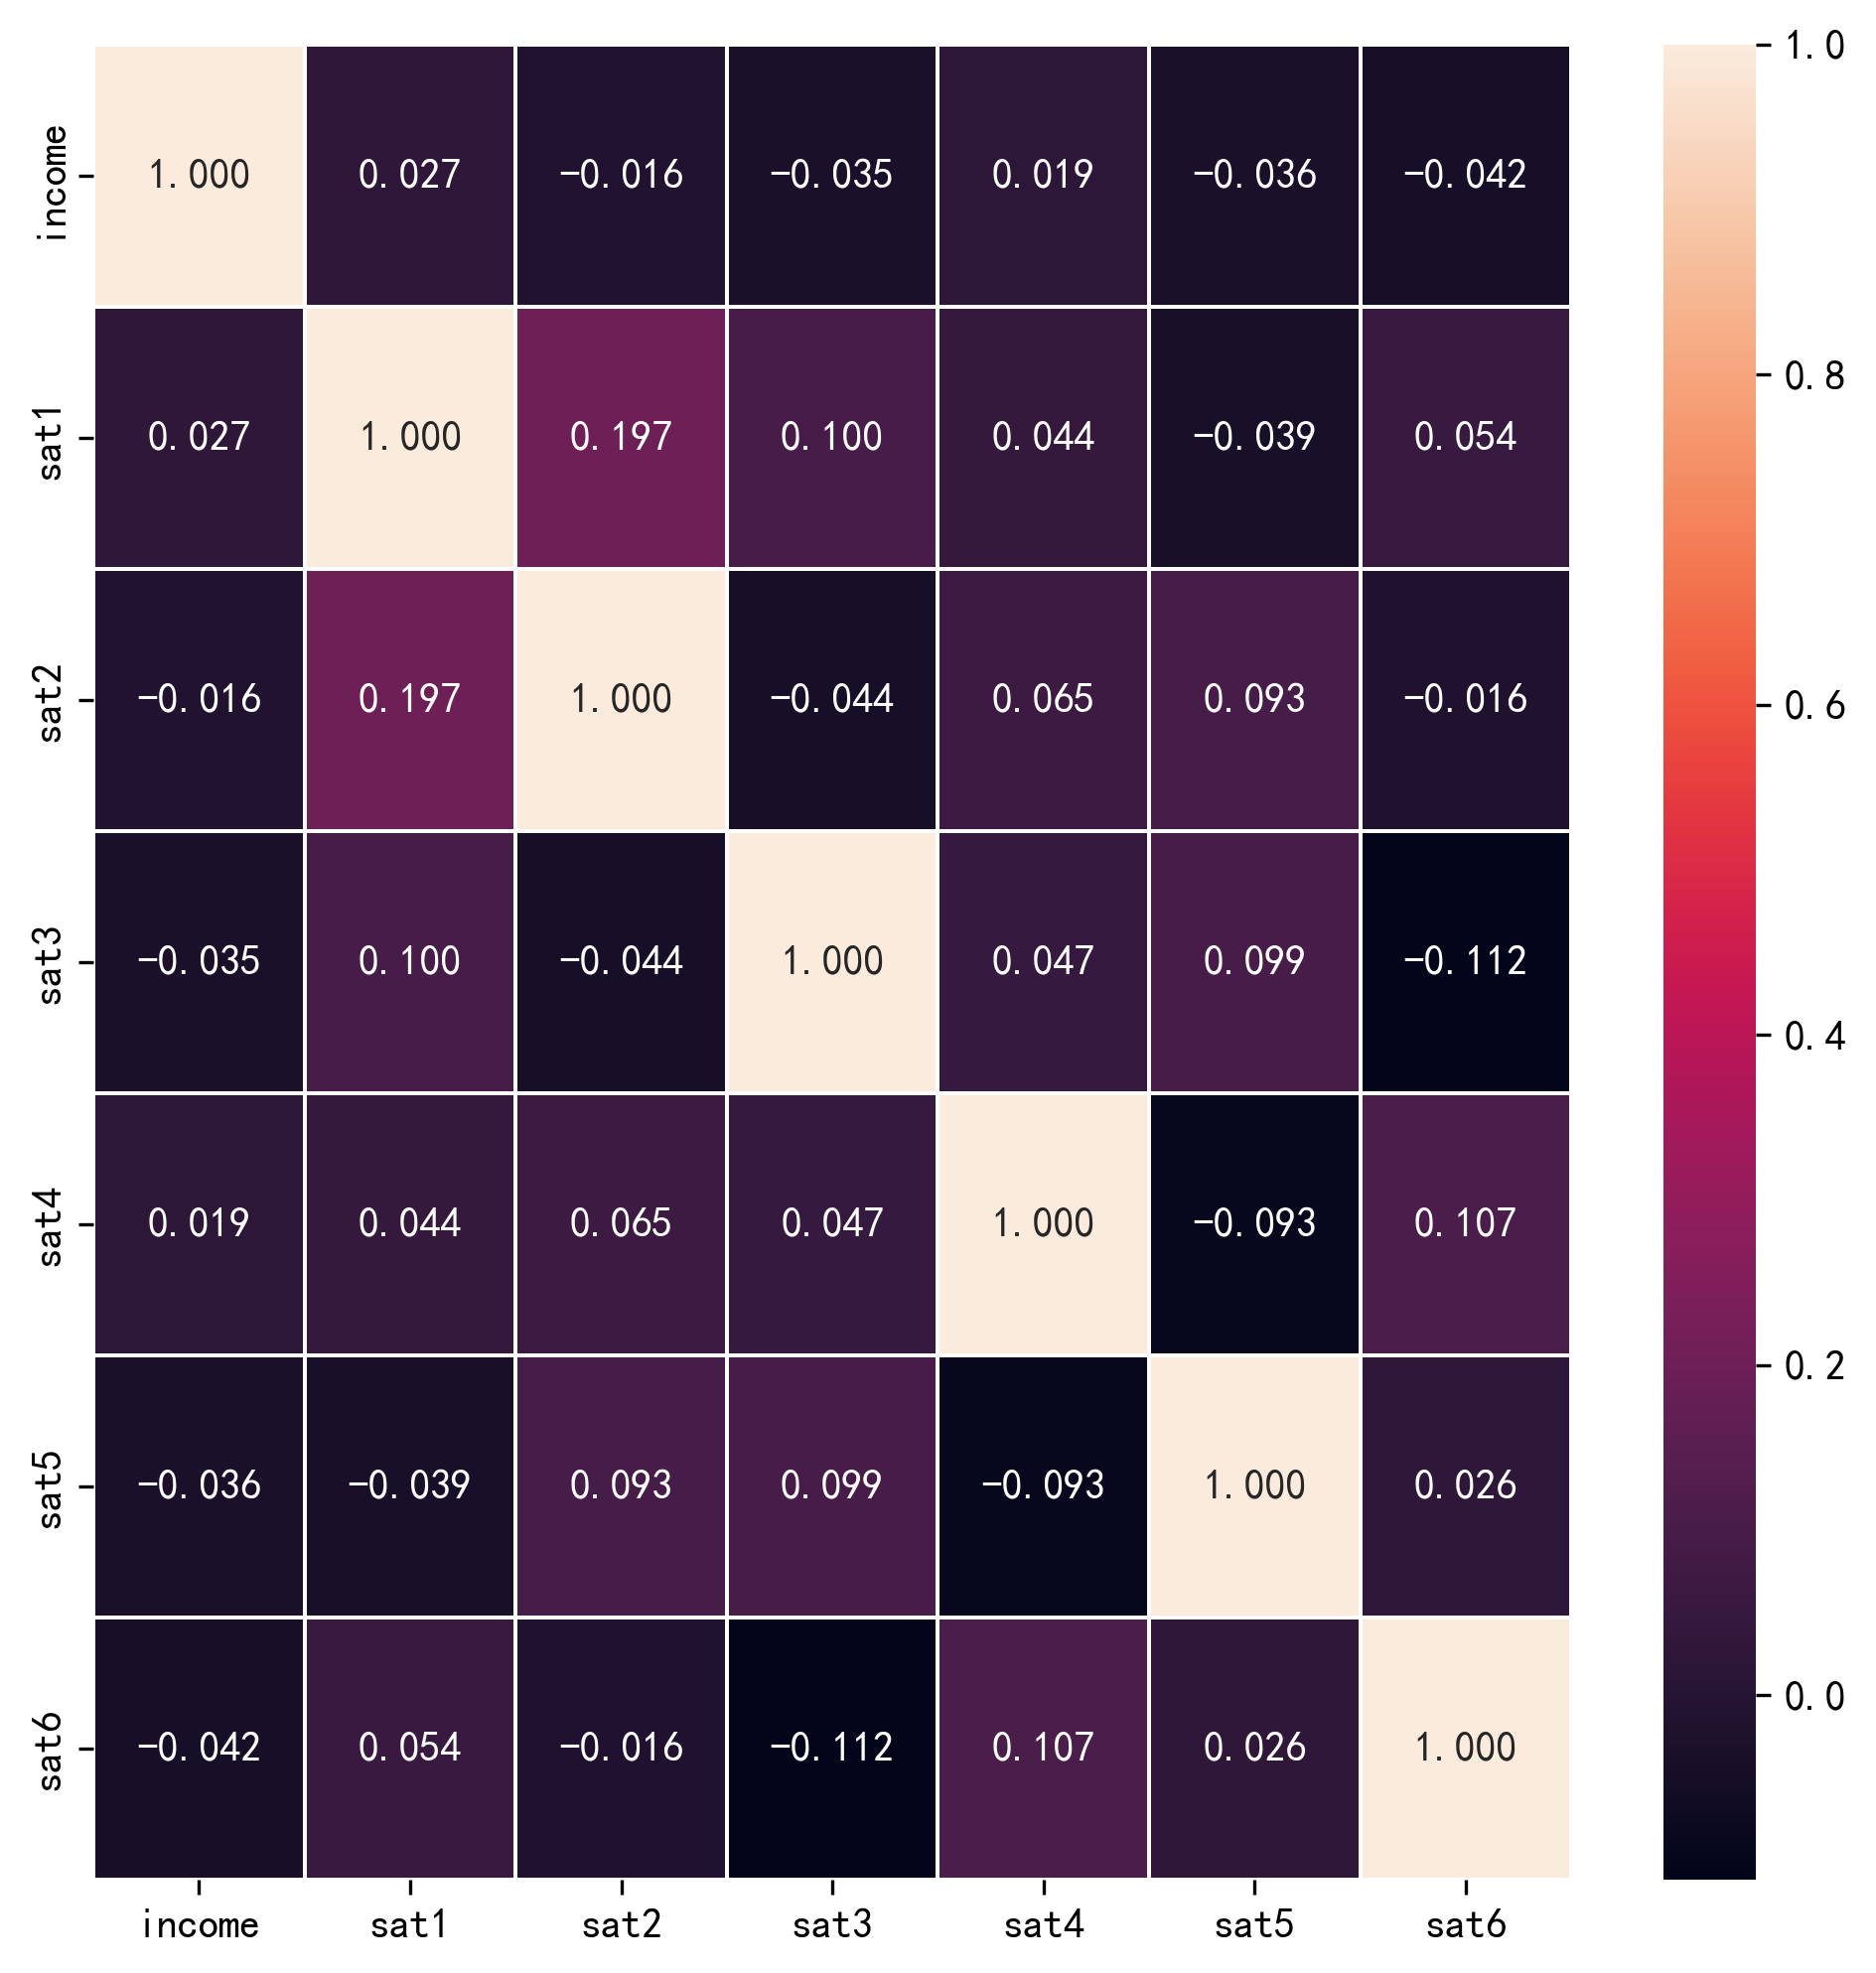

In [77]:
plt.figure(figsize=(8,8), dpi =300)
sns.heatmap(corr_matrix,annot=True,fmt=".3f", linewidth=.5)
plt.show()

## 2.6 逻辑回归分析Logistic regression

### 2.6.1 因变量为二分变量

In [112]:
tourist['type2_class'].value_counts()

type2_class
参与型    195
观赏型    178
Name: count, dtype: int64

In [113]:
tourist['type2'].value_counts()

type2
2    195
1    178
Name: count, dtype: int64

In [117]:
import pandas as pd
import statsmodels.api as sm


# 因变量需要转换为0-1这种二进制的变量
tourist['type2new'] = tourist['type2'].map({1: 1, 2: 0})

# 为逻辑回归添加截距
tourist['intercept'] = 1

# 选择模型变量
X = tourist[['income', 'intercept']]  # 这里可以添加更多控制变量
y = tourist['type2new']

# 构建逻辑回归模型
model = sm.Logit(y, X)
result = model.fit()

# 打印结果
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.688769
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               type2new   No. Observations:                  373
Model:                          Logit   Df Residuals:                      371
Method:                           MLE   Df Model:                            1
Date:                Mon, 11 Nov 2024   Pseudo R-squ.:                0.004824
Time:                        17:00:36   Log-Likelihood:                -256.91
converged:                       True   LL-Null:                       -258.16
Covariance Type:            nonrobust   LLR p-value:                    0.1145
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
income        -0.0002      0.000     -1.573      0.116      -0.001    6.15e-05
intercept      0.5551      0.

### 2.6.2 因变量为多酚类变量

In [119]:
tourist['thotel_class'].value_counts()

thotel_class
经济型酒店    163
民宿       121
酒店式公寓     54
豪华型酒店     35
Name: count, dtype: int64

In [120]:
tourist['thotel'].value_counts()

thotel
1    163
3    121
4     54
2     35
Name: count, dtype: int64

In [121]:
import pandas as pd
import statsmodels.api as sm


# 因变量需要转换为0-1这种二进制的变量
#tourist['type2new'] = tourist['type2'].map({1: 1, 2: 0})

# 为逻辑回归添加截距
tourist['intercept'] = 1

# 选择模型变量
X = tourist[['income', 'intercept']]  # 这里可以添加更多控制变量
y = tourist['thotel']

# 多分类逻辑回归
model = sm.MNLogit(y, X)
result = model.fit()

# 打印结果
print(result.summary())


Optimization terminated successfully.
         Current function value: 1.227605
         Iterations 6
                          MNLogit Regression Results                          
Dep. Variable:                 thotel   No. Observations:                  373
Model:                        MNLogit   Df Residuals:                      367
Method:                           MLE   Df Model:                            3
Date:                Mon, 11 Nov 2024   Pseudo R-squ.:               0.0009557
Time:                        17:02:53   Log-Likelihood:                -457.90
converged:                       True   LL-Null:                       -458.33
Covariance Type:            nonrobust   LLR p-value:                    0.8312
  thotel=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
income        -0.0002      0.000     -0.865      0.387      -0.001       0.000
intercept     -0.9106      0.

# 3.数据可视化data visualization

In [122]:

#设定工作文件夹, 根据自己电脑的情况进行修改
datafolder='D:/tdata/tourist_CN_python/'

In [123]:
tourist=pd.read_feather(datafolder+'tourist.feather')

In [124]:
#-*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

# 显示所有行，所有列
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


## 3.1 快捷做图

<Axes: xlabel='income', ylabel='expense'>

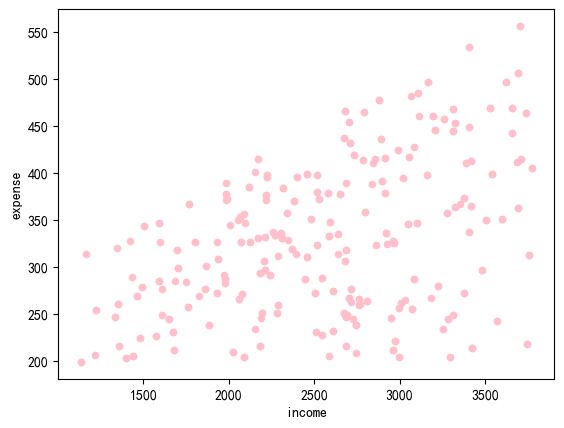

In [125]:
tourist.plot(kind='scatter',x='income',y='expense',color='pink')

## 3.2 散点图



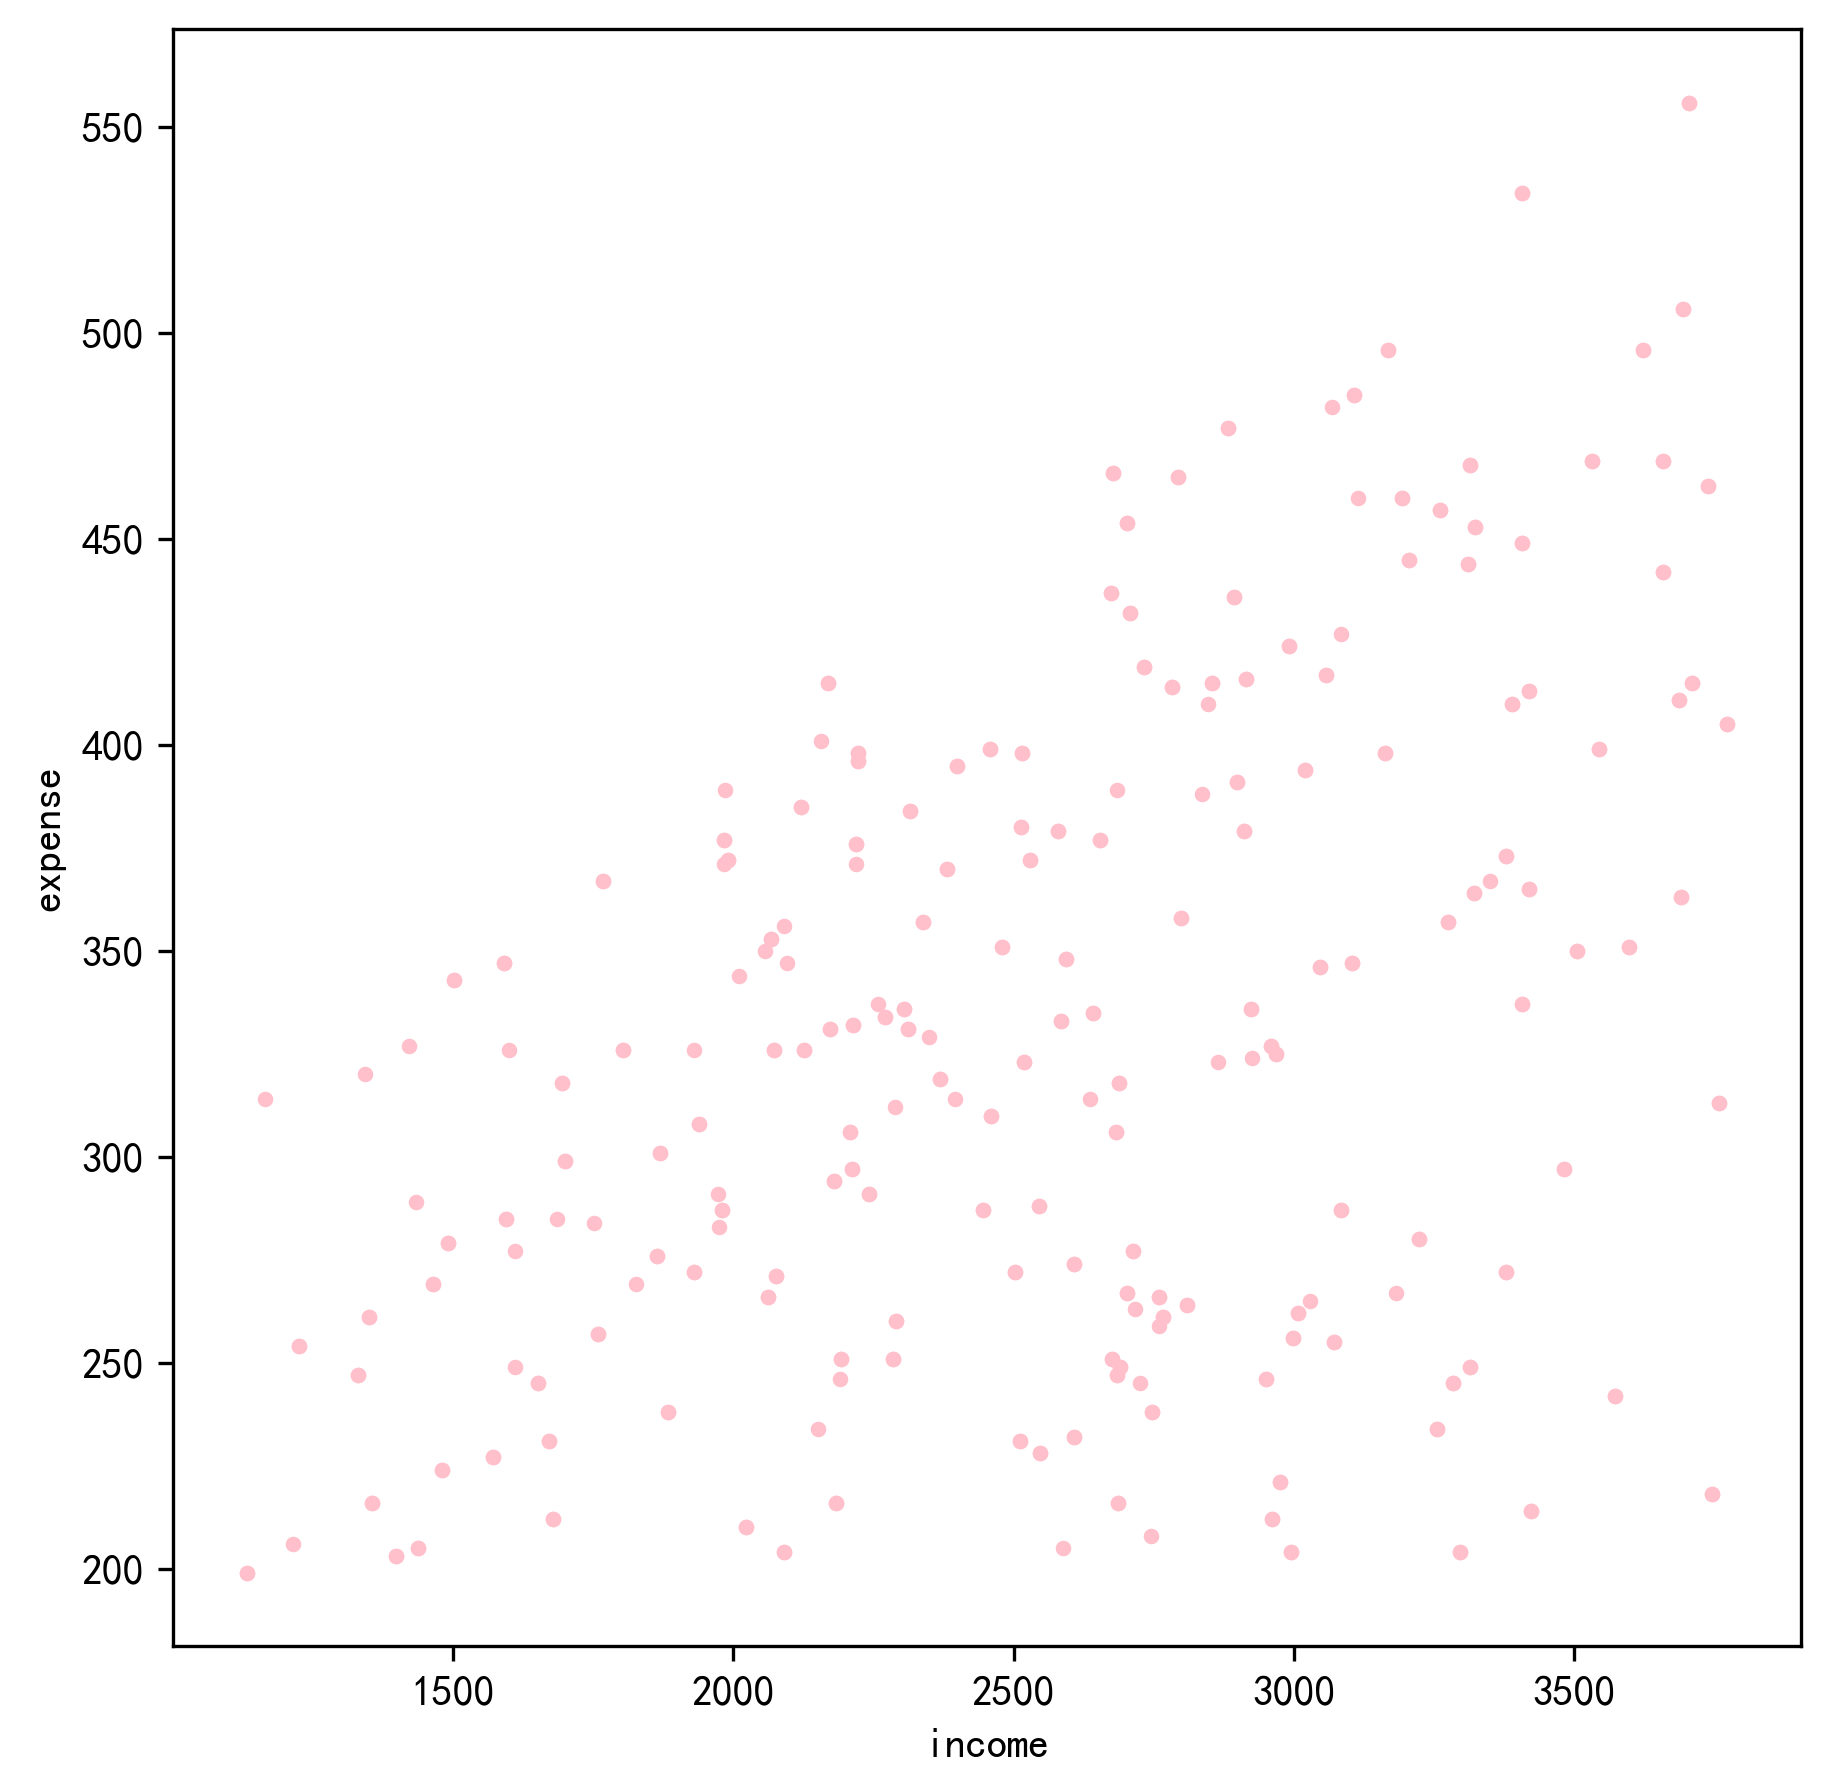

In [126]:
plt.figure(figsize=(7,7), dpi =300)
plt.scatter(tourist['income'], tourist['expense'], c ="pink",
            linewidths = 2,
            marker ="o",
            edgecolor ="pink",
            s = 3)
plt.xlabel("income")
plt.ylabel("expense")
plt.show()

### 3.2.1 散点图的分组着色

基于gender给数据点着色

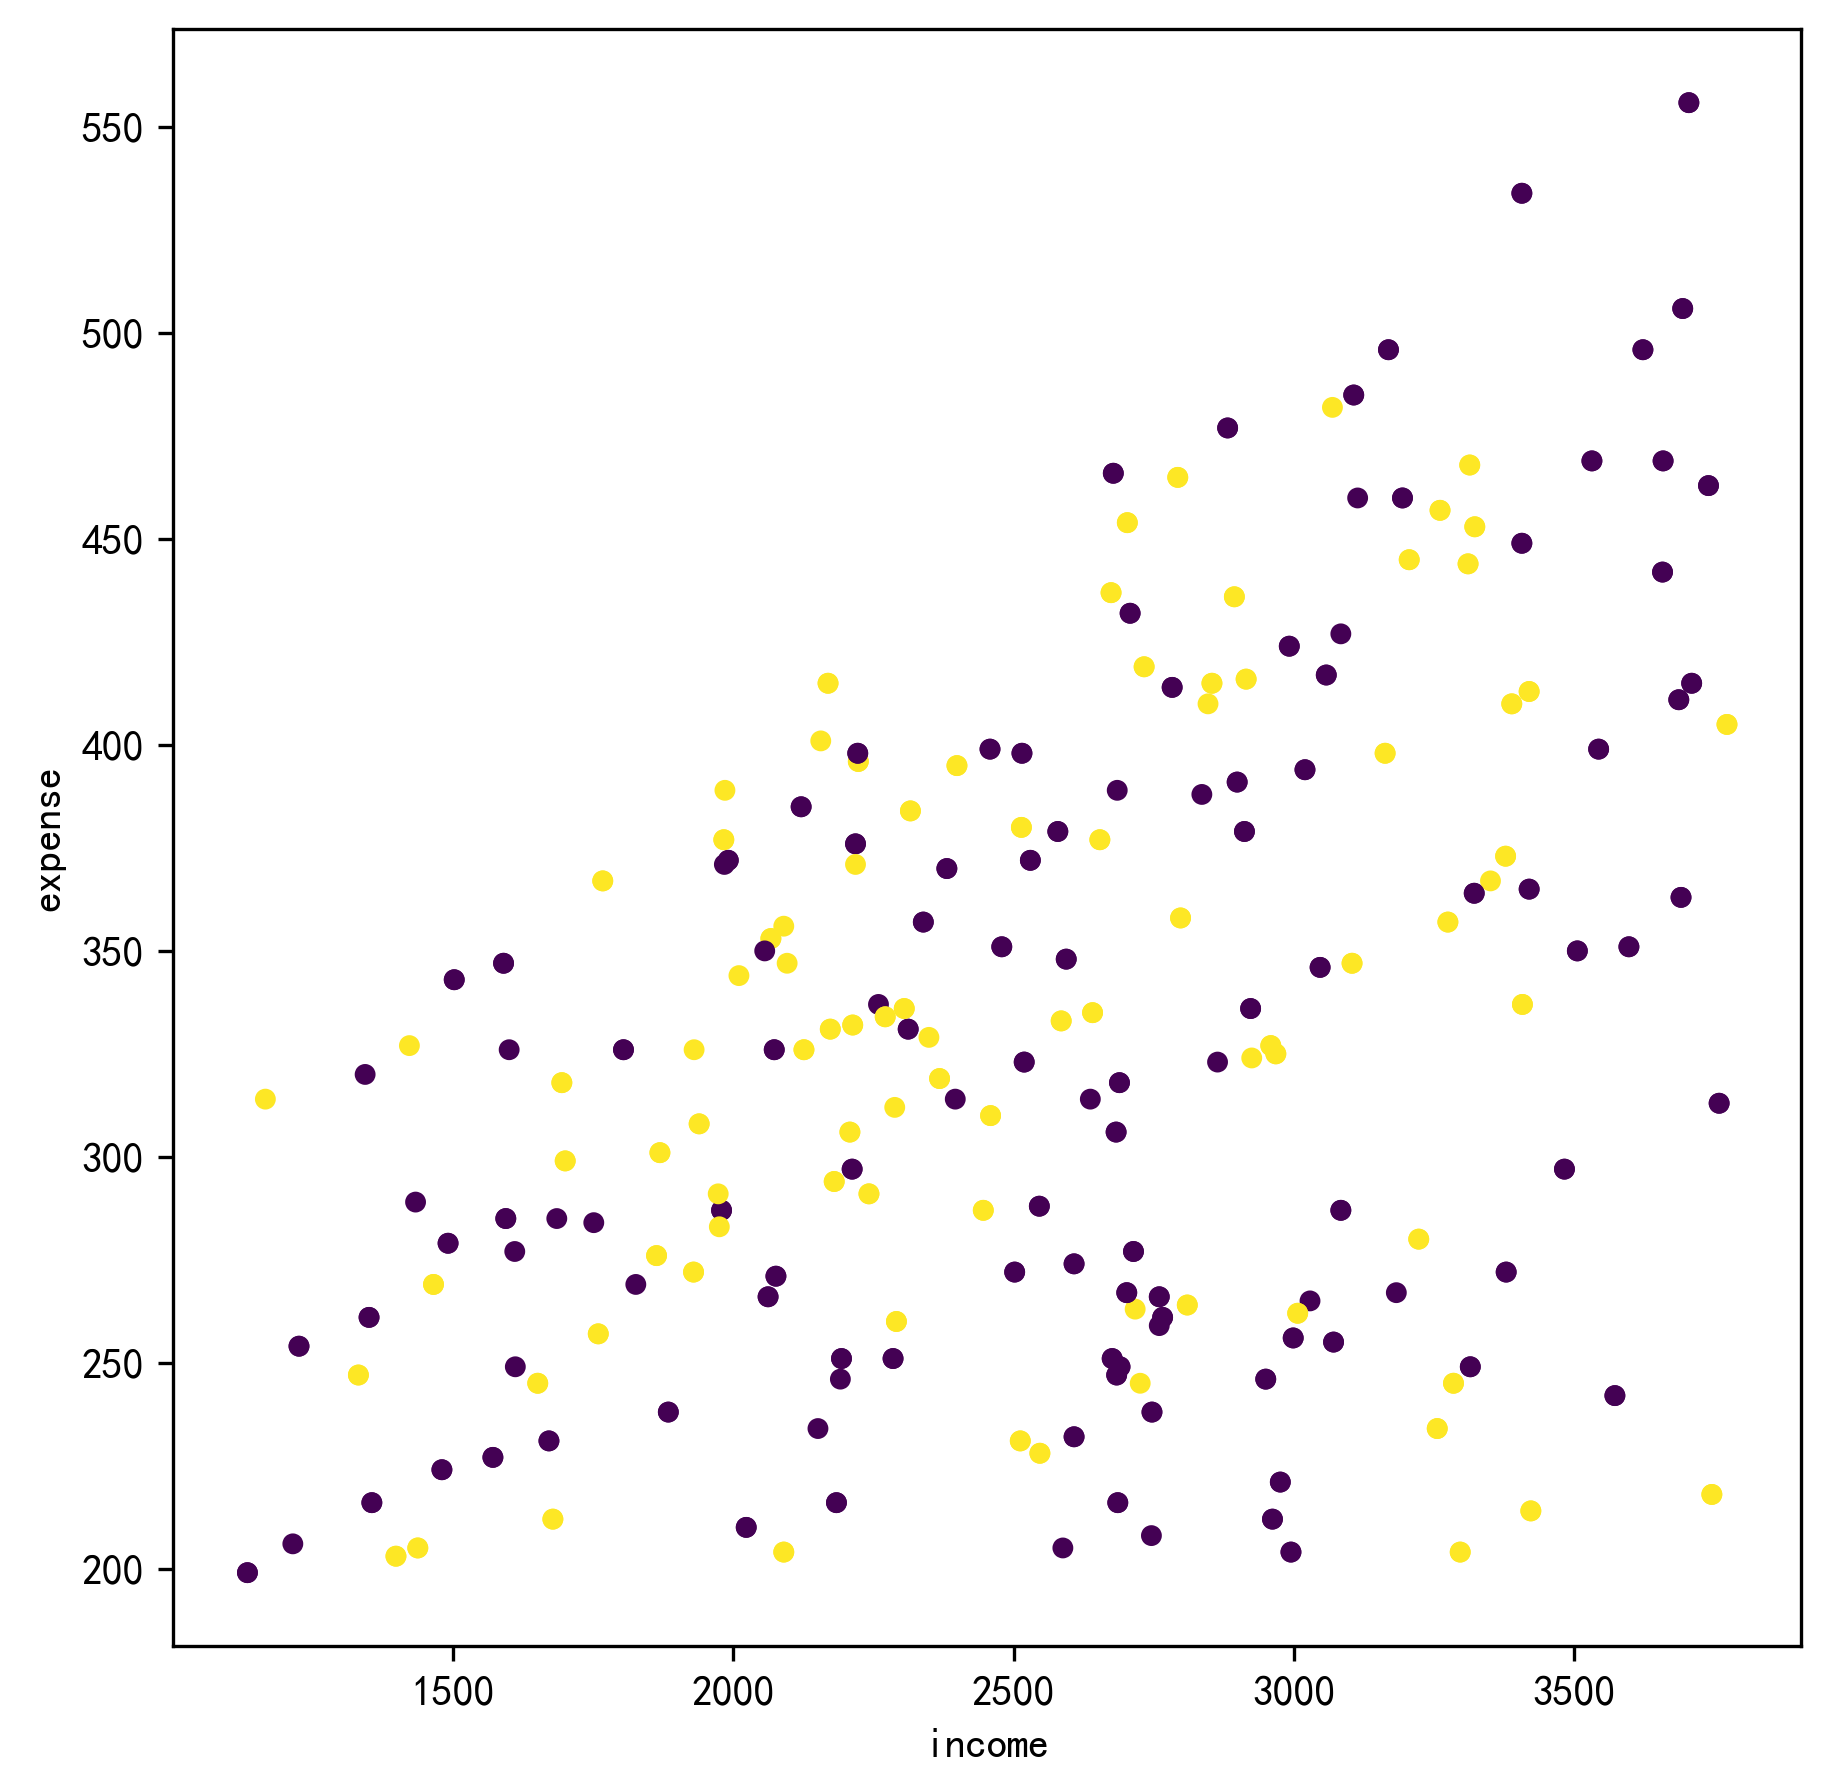

In [127]:
plt.figure(figsize=(7,7), dpi =300)
plt.scatter(tourist['income'], tourist['expense'], c =tourist['gender'],
            linewidths = 2,
            marker ="o",
            s = 9)
 
plt.xlabel("income")
plt.ylabel("expense")
plt.show()

type3给数据点着色

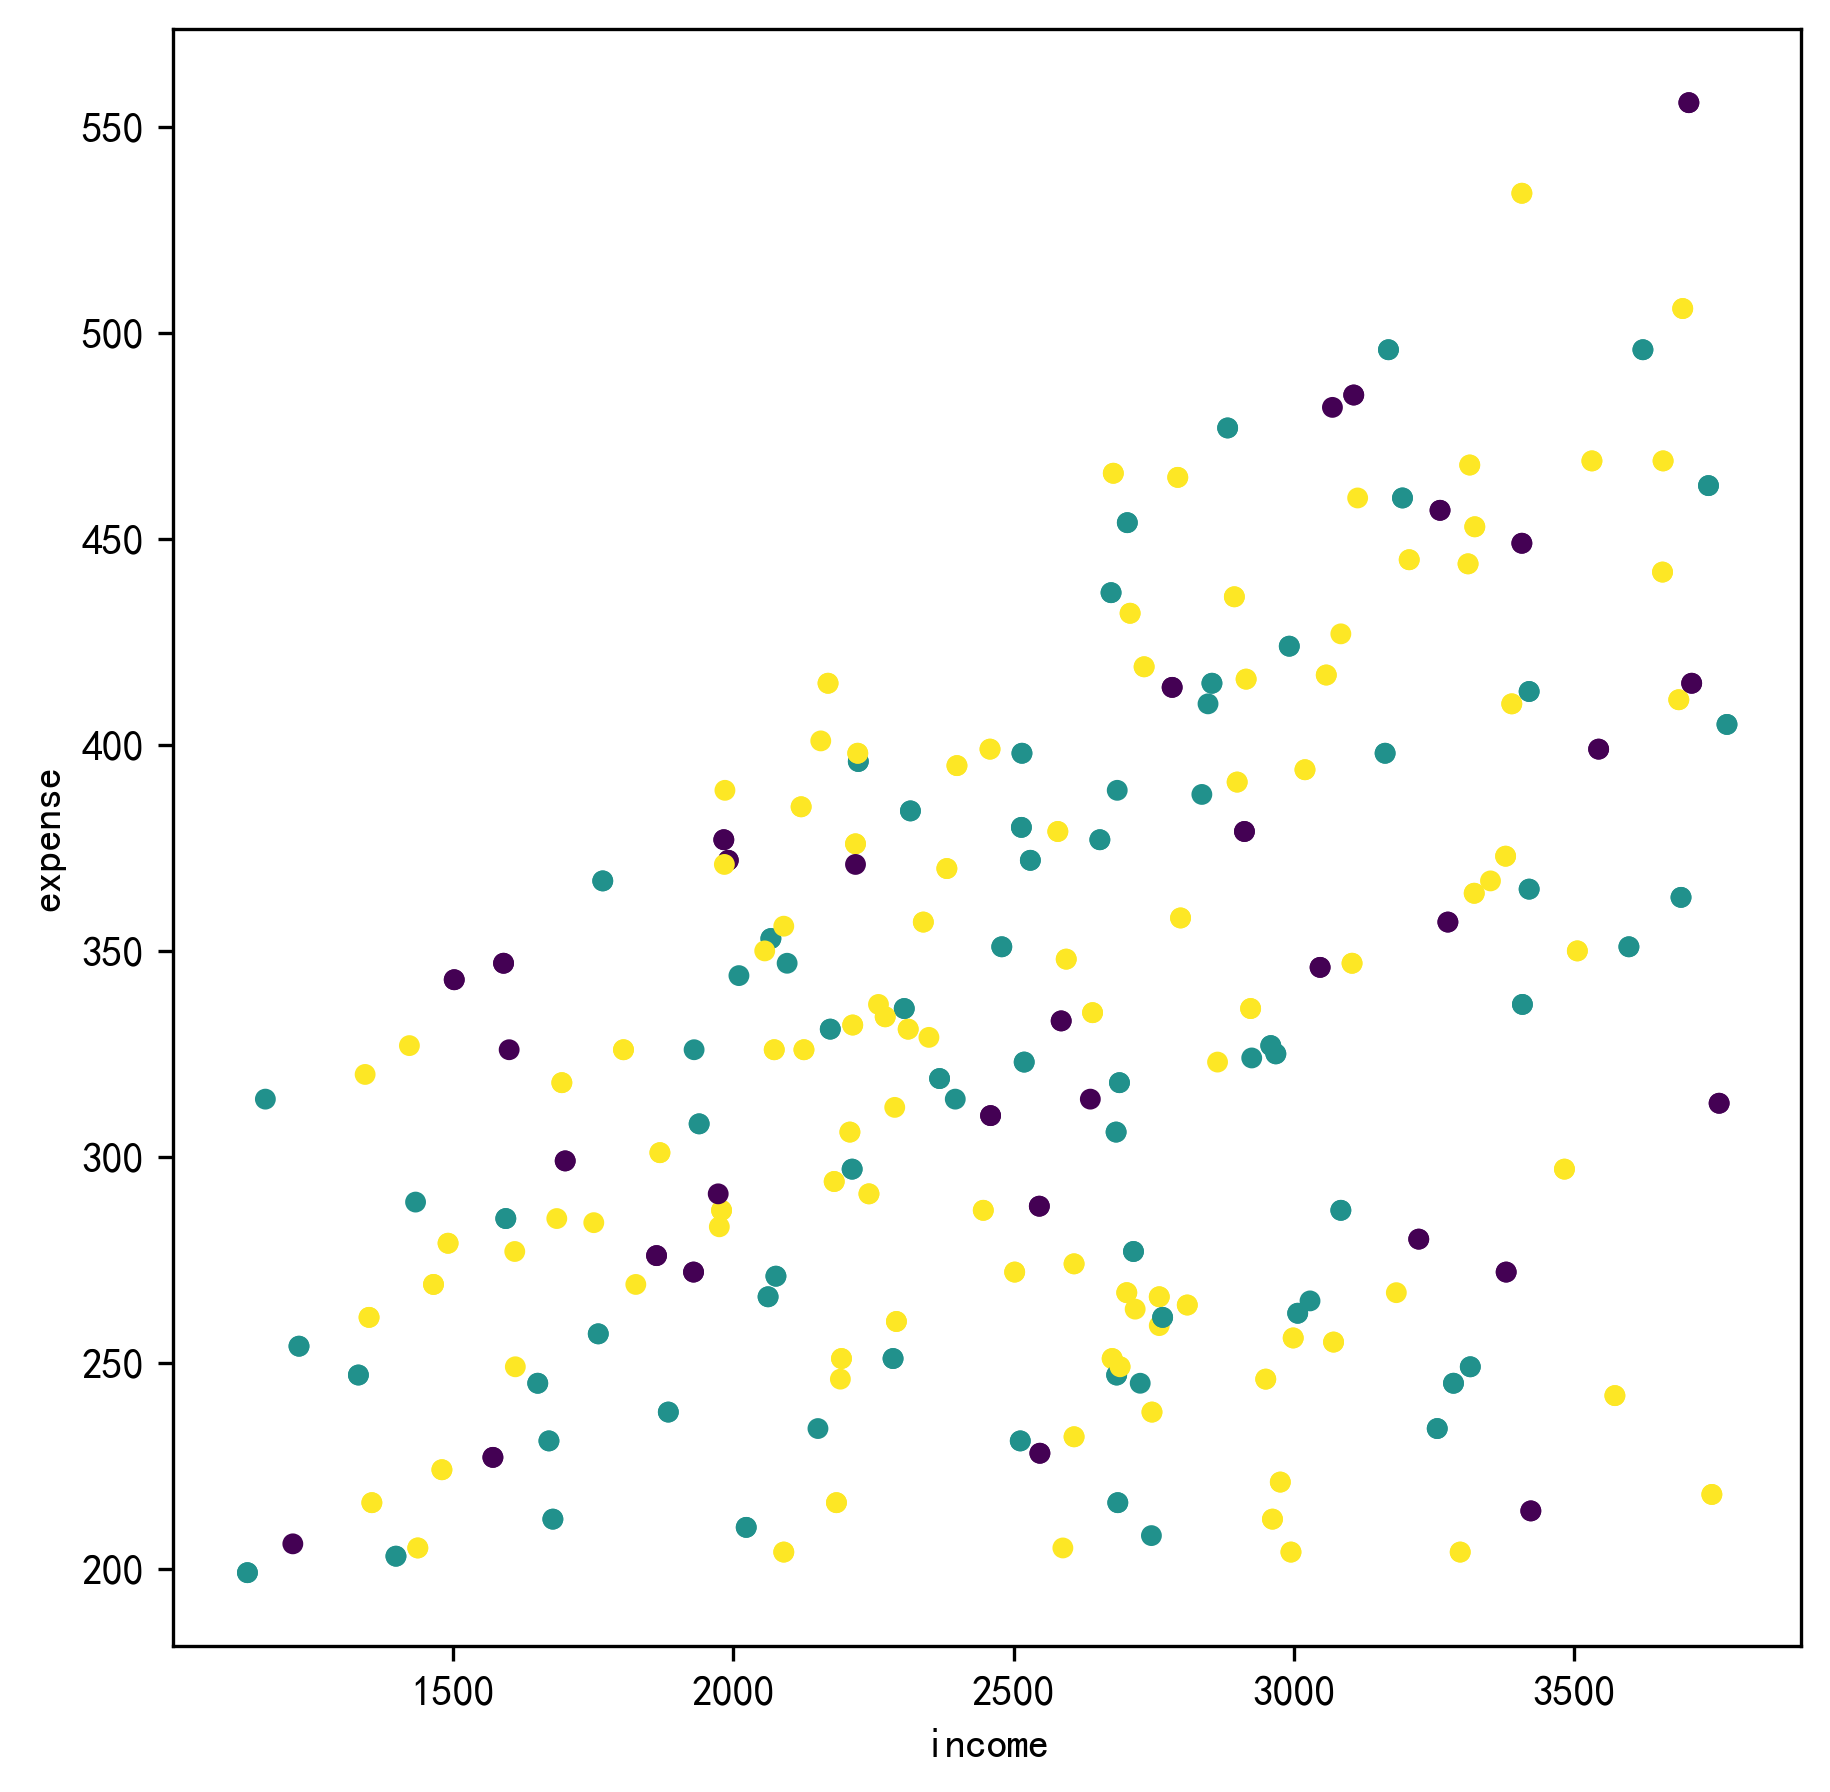

In [128]:
plt.figure(figsize=(7,7), dpi =300)
plt.scatter(tourist['income'], tourist['expense'], c =tourist['type3'],
            linewidths = 2,
            marker ="o",
            s = 9)
 
plt.xlabel("income")
plt.ylabel("expense")
plt.show()

### 3.2.2 散点图的分面（facet）

使用type3进行分面

In [129]:
data1=tourist[tourist['type3']==1][['income','expense']]
data2=tourist[tourist['type3']==2][['income','expense']]
data3=tourist[tourist['type3']==3][['income','expense']]


In [130]:
data1.shape

(58, 2)

<Figure size 900x3000 with 0 Axes>

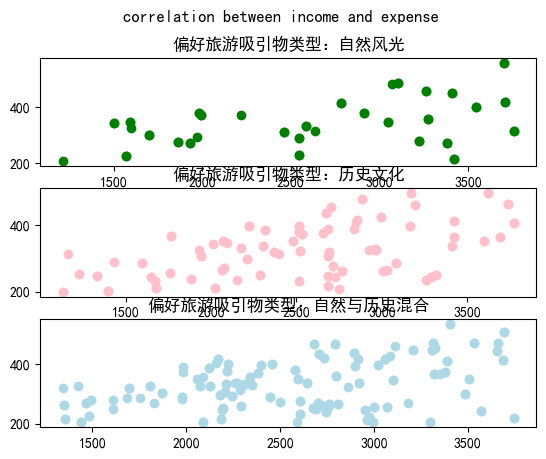

In [131]:
plt.figure(figsize=(3,10), dpi =300)
fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.suptitle('correlation between income and expense')
ax1.scatter(data1['income'], data1['expense'],c='green')
ax2.scatter(data2['income'], data2['expense'],c='pink')
ax3.scatter(data3['income'], data3['expense'],c='lightblue')

ax1.title.set_text('偏好旅游吸引物类型：自然风光')
ax2.title.set_text('偏好旅游吸引物类型：历史文化')
ax3.title.set_text('偏好旅游吸引物类型：自然与历史混合')




#tourist.loc[(tourist['type3']==1) , 'type3_class'] = "自然风光"
#tourist.loc[(tourist['type3']==2) , 'type3_class'] = "历史文化"
#tourist.loc[(tourist['type3']==3) , 'type3_class'] = "自然与历史混合"





使用gender进行分面

In [132]:
data1=tourist[(tourist['type2']==1 ) & ( tourist['gender']==1)][['income','expense']]
data2=tourist[(tourist['type2']==2 ) & ( tourist['gender']==1)][['income','expense']]
data3=tourist[(tourist['type2']==1 ) & ( tourist['gender']==2)][['income','expense']]
data4=tourist[(tourist['type2']==2 ) & ( tourist['gender']==2)][['income','expense']]

<Figure size 2100x2100 with 0 Axes>

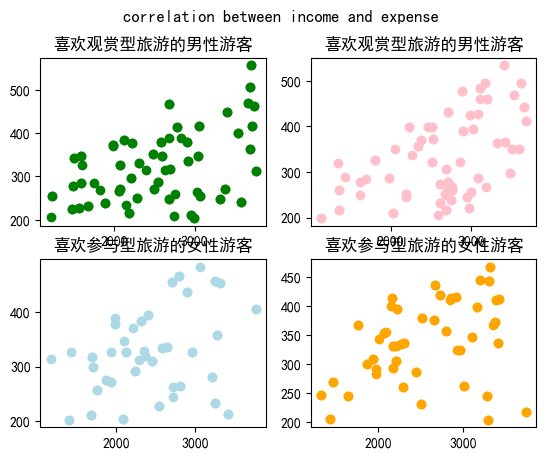

In [133]:
plt.figure(figsize=(7,7), dpi =300)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

fig.suptitle('correlation between income and expense')
ax1.scatter(data1['income'], data1['expense'],c='green')
ax2.scatter(data2['income'], data2['expense'],c='pink')
ax3.scatter(data3['income'], data3['expense'],c='lightblue')
ax4.scatter(data4['income'], data4['expense'],c='orange')

ax1.title.set_text('喜欢观赏型旅游的男性游客')
ax2.title.set_text('喜欢观赏型旅游的男性游客')
ax3.title.set_text('喜欢参与型旅游的女性游客')
ax4.title.set_text('喜欢参与型旅游的女性游客')


# tourist['gender_class'] = np.where(tourist['gender']==1, '男', '女')
# tourist.loc[(tourist['type2']==1) , 'type2_class'] = "观赏型"
# tourist.loc[(tourist['type2']==2) , 'type2_class'] = "参与型"



### 3.2.3 保存输出图片

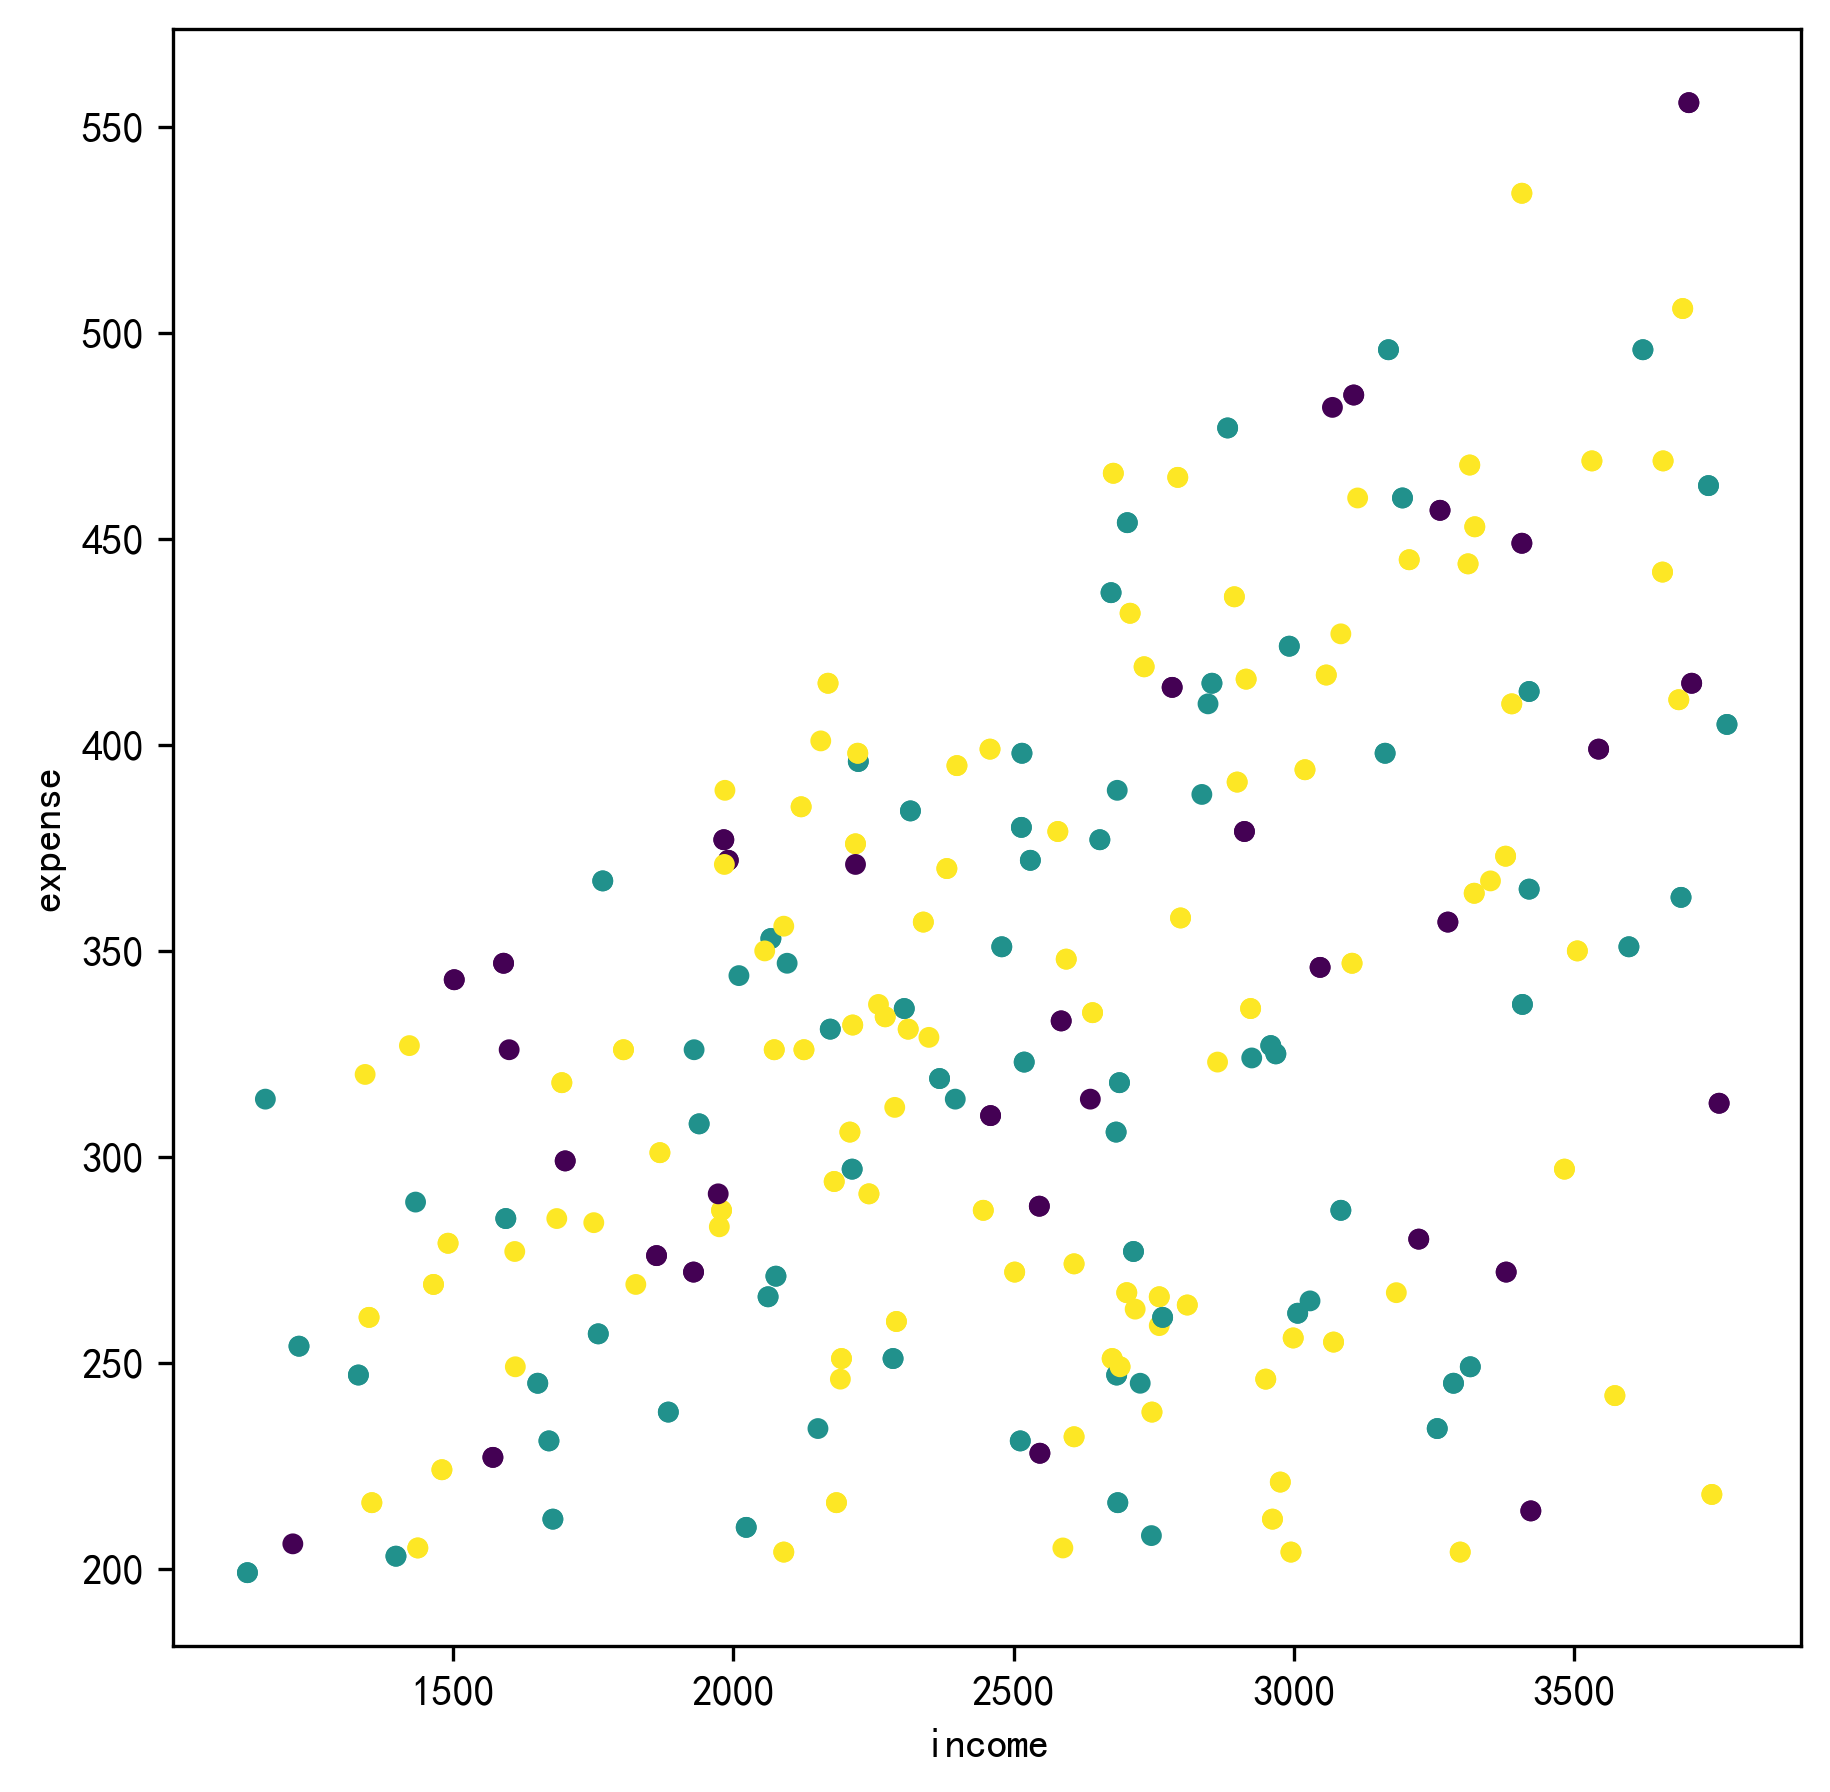

In [134]:
plt.figure(figsize=(7,7), dpi =300)
plt.scatter(tourist['income'], tourist['expense'], c =tourist['type3'],
            linewidths = 2,
            marker ="o",
            s = 9)
 
plt.xlabel("income")
plt.ylabel("expense")


# saving the figure.
plt.savefig(datafolder+"scatter_income_expense_by_type3.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            facecolor ="white",
            edgecolor ="white",
            orientation ='landscape')
plt.show()

## 3.3 柱形图（histogram）

### 3.3.1 柱形图的基本框架

<Axes: title={'center': '住宿满意度'}, ylabel='Frequency'>

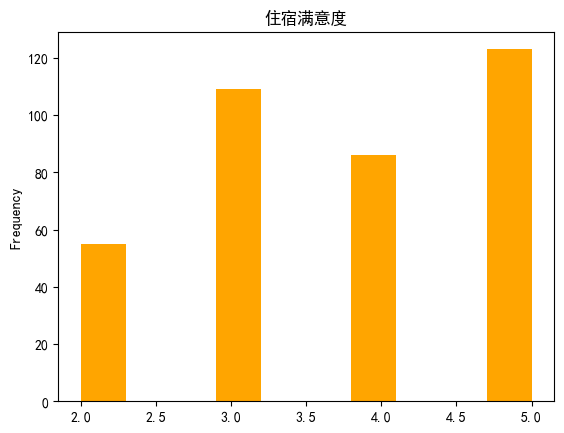

In [135]:
tourist.plot(kind='hist',y='sat2',color='orange',title='住宿满意度',legend='')
# sat1 景区sat
# sat2 住宿sat
# sat3 餐饮sat
# sat4 交通sat
# sat5 娱乐sat
# sat6 购物sat  

### 3.3.2 柱形图的详细设置

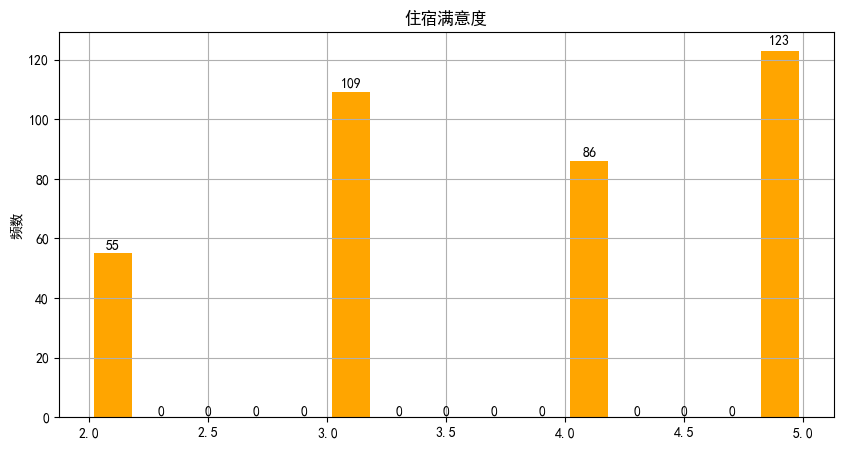

In [136]:
# html color codes
# https://html-color.codes/
# r colors names
# https://r-charts.com/colors/

# 1.创建画布
plt.figure(figsize=(10, 5))

# 2.绘制图像
n, bins, patches = plt.hist(tourist['sat2'].values, bins=15,rwidth=0.8,color="orange")
# n 为 各个bin里面的计数; bins 为 bin 的边界值组成的 列表; patches 为 图形

# 2.0 在每个条柱上标注数量
for i in range(len(n)):
        plt.text(bins[i]+(bins[1]-bins[0])/2, n[i]*1.01, int(n[i]), ha='center', va= 'bottom')
        
# 2.1 添加刻度
min_1 = tourist['sat2'].min()
max_1 = tourist['sat2'].max()

#t1 = np.linspace(min_1, max_1, num=11)

#plt.xticks(t1)

# 2.2 添加网格和标题
plt.grid()
plt.title("住宿满意度")
plt.xlabel("")
plt.ylabel("频数")



# 3.保存图片
plt.savefig(datafolder+'sat2_distribution.png')

# 4.显示
plt.show()

## 3.4 map地图

参考网址：
https://python-visualization.github.io/folium/quickstart.html

In [137]:
#设定工作文件夹, 根据自己电脑的情况进行修改
datafolder='D:/tdata/tourist_CN_python/'

load是用于载入保存了的rda格式数据

In [138]:
tourist=pd.read_feather(datafolder+'tourist.feather')

In [139]:
import folium
from folium.plugins import MarkerCluster

leaflet地图

In [140]:
tourist.shape[0]

373

In [143]:
# 中心位置，缩放等级
center_lon = tourist['longitude'].median()
center_lat = tourist['latitude'].median()

boulder_coords=[center_lat,center_lon]

#Create the map
my_map = folium.Map(location = boulder_coords, zoom_start = 9)
for i in range(0,tourist.shape[0]):
    folium.Marker(location=[tourist.loc[i,'latitude'],tourist.loc[i,'longitude']]).add_to(my_map)

#save the map
my_map.save(datafolder+"tourist_map.html")

#Display the map
my_map


这个地图是基于folium，可以缩放https://realpython.com/python-folium-web-maps-from-data/
<p>
<img src="http://kaiwu.city/images/map1.png" width="700" align=left>
<p><br>


<p>放大之后的效果:<p><p>
<img src="http://kaiwu.city/images/map2.png" width="700" align=left>

In [144]:
my_map.save(datafolder+"tourist_map.html")


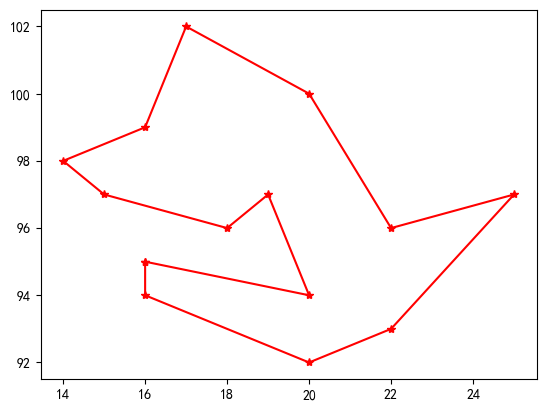

In [145]:
import matplotlib.pyplot as plt

x=[16,16,20,22,25,22,20,17,16,14,15,18,19,20]
y=[95,94,92,93,97,96,100,102,99,98,97,96,97,94]

x.append(x[0])
y.append(y[0])
plt.plot(x,y,color='r',marker='*')
plt.show()

## 3.5 IPA图

IPA（importance-performance analysis）重要性-表现分析方法 IPA相对简单，但是在管理、营销领域广泛使用

Mejia, C., Bąk, M., Zientara, P., & Orlowski, M. (2022). Importance-Performance Analysis of Socially Sustainable Practices in U.s. Restaurants: A Consumer Perspective in the Quasi-Post-Pandemic Context. International Journal of Hospitality Management, 103, 103209. https://doi.org/10.1016/j.ijhm.2022.103209

In [146]:

#设定工作文件夹, 根据自己电脑的情况进行修改
datafolder='D:/tdata/tourist_CN_python/'

In [147]:
tourist=pd.read_feather(datafolder+'tourist.feather')

In [148]:
tourist.head()

sid  gender  byear  region  income  expense  type3  type2  thotel  sat1  \
0  rec001       1   1971       1    2708      432      3      2       3     4   
1  rec002       1   1995       1    1884      238      2      1       3     5   
2  rec003       1   1990       2    2458      399      3      2       3     3   
3  rec004       2   1970       2    2726      245      2      1       1     5   
4  rec005       1   1964       4    3084      287      2      2       2     5   

   sat2  sat3  sat4  sat5  sat6  ri1  ri2  ri3  ri4  ri5  rp1  rp2  rp3  rp4  \
0     2     2     3     4     4    4    4    4    5    4    4    5    4    5   
1     5     4     5     3     5    4    3    4    4    5    4    3    4    4   
2     4     5     3     3     2    5    5    5    5    5    5    5    4    5   
3     2     3     5     4     4    4    5    5    5    5    4    5    5    5   
4     3     5     2     4     5    5    5    5    5    5    5    5    5    5   

   rp5  te1  te2  te3  te4  te5  te6  te7  te8  zh1  zh2  zh3  zh4  zh5  zh6  \
0    4    4    4    4    4    4    4    4    4    3    1    1    2    3    2   
1    5    5    5    4    4    4    5    3    4    4    4    5    3    5    5   
2    5    3    4    4    4    4    4    4    4    1    1    2    2    1    3   
3    5    4    4    4    4    5    4    2    4    3    3    3    3    2    2   
4    5    4    5    4    4    5    5    4    5    1    1    1    4    2    1   

   zh7  latitude  longitude gender_class thotel_class type3_class type2_class  \
0    2  31.24039  121.66525            男           民宿     自然与历史混合         参与型   
1    5  31.20866  121.46039            男           民宿        历史文化         观赏型   
2    1  31.10409  121.39581            男           民宿     自然与历史混合         参与型   
3    2  31.06726  121.16962            女        经济型酒店        历史文化         观赏型   
4    1  31.17709  121.67953            男        豪华型酒店        历史文化         参与型   

  region_class    sat  age    income3    income5 expense3  
0           华中  3.167   53  2000-3000  2500-2999    400以上  
1           华中  4.500   29     2000以下     2000以下    300以下  
2           华东  3.333   34  2000-3000  2000-2499  300-399  
3           华东  3.833   54  2000-3000  2500-2999    300以下  
4           东北  4.000   60     3000以上  3000-3499    300以下

In [149]:
review_label=['评论数量','评论发表日期','评论与酒店性能关联','正向评价','发布者资信度']

imdata=tourist[["ri1","ri2","ri3","ri4","ri5"]].mean().tolist()
pedata=tourist[["rp1","rp2","rp3","rp4","rp5"]].mean().tolist()


ipa=pd.DataFrame([imdata,pedata,review_label]).T
ipa.columns=['importance','performance','review_label']
ipa

importance performance review_label
0   4.351206    4.316354         评论数量
1   4.490617    4.514745       评论发表日期
2    4.49866    4.383378    评论与酒店性能关联
3   4.707775     4.72118         正向评价
4   4.726542    4.643432       发布者资信度

C:\Users\kaiwu\AppData\Local\Temp\ipykernel_17980\3244213638.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(label, (importance[i], performance[i]))


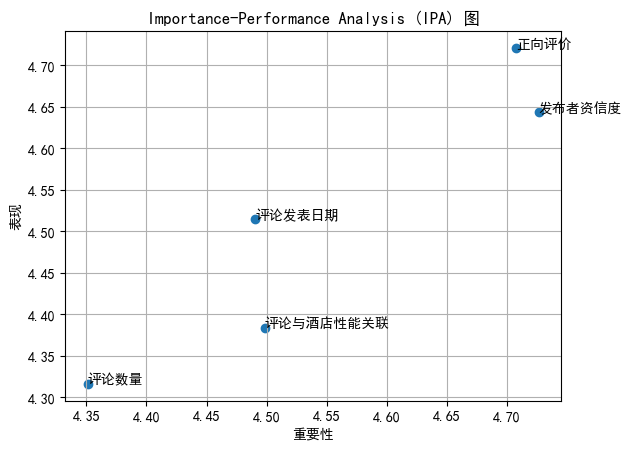

In [150]:
import matplotlib.pyplot as plt

# Prepare data for plotting
importance = tourist[['ri1', 'ri2', 'ri3', 'ri4', 'ri5']].mean()
performance = tourist[['rp1', 'rp2', 'rp3', 'rp4', 'rp5']].mean()
labels = ['评论数量', '评论发表日期', '评论与酒店性能关联', '正向评价', '发布者资信度']

# Create the plot
fig, ax = plt.subplots()
scatter = ax.scatter(importance, performance)

# Annotate each point with attribute label
for i, label in enumerate(labels):
    ax.annotate(label, (importance[i], performance[i]))

# Set plot labels and title
ax.set_xlabel('重要性')
ax.set_ylabel('表现')
ax.set_title('Importance-Performance Analysis (IPA) 图')

# Show the plot
plt.grid(True)
plt.show()

# 4.EFA探索性因子分析

<span style="font-size: 90 px;"><span style="color: red;">不知道</span>items分几个维度，<span style="color: red;">不知道</span>这些items与维度之间的关系，采用EFA探索维度  </span>

探索性因子分析（Exploratory Factor Analysis，EFA）是一种统计方法，用于发现在一组观测变量中潜在的关联结构。EFA 的目标是确定少数几个未观测的潜在变量（称为因子），这些因子可以解释多个观测变量间的共同变异性。这种方法常用于问卷数据分析、心理测试和社会科学研究。

EFA 的基本步骤包括：
数据准备：确保数据适合进行因子分析，例如，变量间应具有一定的相关性。<p>
选择因子提取方法：常用的方法包括主成分分析（PCA）和主轴因子法（PAF）。<p>
确定因子数：可以通过Kaiser准则（Eigenvalues 大于1的因子数）、累计方差解释率、碎石图（Scree Plot）或并行分析来决定。<p>
因子旋转：为了获得更有解释性的因子结构，通常会进行因子旋转，常见的旋转方法有正交旋转（如 Varimax）和斜交旋转（如 Oblimin）。<p>
解释因子：根据因子载荷矩阵（Factor Loadings），解释每个因子代表的潜在变量或构念。<p>
评估因子模型的适用性：通过各种拟合指标，如因子载荷的显著性、复现性和模型的整体拟合度。<p>

In [156]:
#设定工作文件夹, 根据自己电脑的情况进行修改
datafolder='D:/tdata/tourist_CN_python/'
tourist=pd.read_feather(datafolder+'tourist.feather')

## 4.1 数据准备

In [157]:
from sklearn.decomposition import FactorAnalysis
from scipy.stats import bartlett

# Extract the relevant variables
zh_data = tourist[['zh1', 'zh2', 'zh3', 'zh4', 'zh5', 'zh6', 'zh7']]


## 4.2 kmo test

KMO(Kaiser-Meyer-Olkin)
检验值0-1之间，值越大越适合探索性因子分析EFA，通常至少0.7以上<p>
KMO Score>0.7 表示适合EFA，但是并<span style="color: red;">没有</span>进行EFA

In [158]:
# ! pip install factor_analyzer

In [159]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity


kmo_all, kmo_model = calculate_kmo(zh_data)
print("KMO Score:", kmo_model)

KMO Score: 0.8723257979265658


## 4.3 Bartlett's test

Bartlett球形检验 Bartlett's test of sphericity<p>
p<0.05，统计上显著，表示适合探索性因子分析EFA<p>
但是并<span style="color: red;">没有</span>进行EFA

In [161]:
# Bartlett’s Test of Sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(zh_data)
print("Bartlett’s Test - chi-square:", chi_square_value, "p-value:", p_value)


Bartlett’s Test - chi-square: 1820.5690773455567 p-value: 0.0


## 4.4判断因子数量

In [181]:
from sklearn.decomposition import PCA
import numpy as np

# Step 1: Calculate Eigenvalues from Actual Data
pca = PCA()
pca.fit(zh_data)
actual_eigenvalues = pca.explained_variance_

# Step 2 and 3: Generate Random Data and Compute Eigenvalues
np.random.seed(0)  # for reproducibility
n_simulations = 100
n_samples, n_features = zh_data.shape
random_eigenvalues = np.zeros((n_simulations, n_features))

for i in range(n_simulations):
    random_data = np.random.normal(size=(n_samples, n_features))
    pca.fit(random_data)
    random_eigenvalues[i, :] = pca.explained_variance_

# Step 4: Calculate the mean eigenvalues from random data
mean_random_eigenvalues = np.mean(random_eigenvalues, axis=0)

# Prepare results for comparison
comparison = pd.DataFrame({
    'Actual Eigenvalues': actual_eigenvalues,
    'Mean Random Eigenvalues': mean_random_eigenvalues
})

comparison


Actual Eigenvalues  Mean Random Eigenvalues
0            7.666425                 1.226494
1            1.784901                 1.127133
2            0.713758                 1.055241
3            0.499648                 0.991306
4            0.445474                 0.927605
5            0.385773                 0.866789
6            0.335149                 0.785071

推荐提取2个因子

## 4.5 提取2个因子

In [182]:
# Perform Factor Analysis assuming 2 factors as an initial guess
fa = FactorAnalyzer(n_factors=2, rotation='varimax')  # Adjust n_factors based on your analysis

fa.fit(zh_data)

# Extracting the loadings
loadings = fa.loadings_

## 4.6 EFA结果的可视化

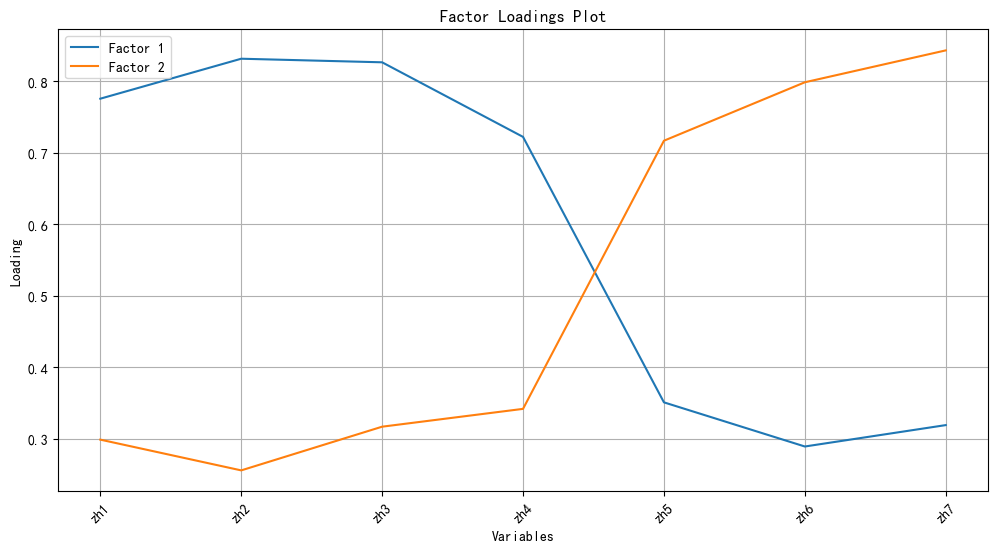

In [164]:
# Plotting the factor loadings
loadings = fa.loadings_
plt.figure(figsize=(12, 6))
for i in range(2):  # We have two factors
    plt.plot(loadings[:, i], label=f'Factor {i+1}')
plt.xticks(ticks=range(zh_data.shape[1]), labels=zh_data.columns, rotation=45)
plt.ylabel('Loading')
plt.xlabel('Variables')
plt.title('Factor Loadings Plot')
plt.legend()
plt.grid(True)
plt.show()

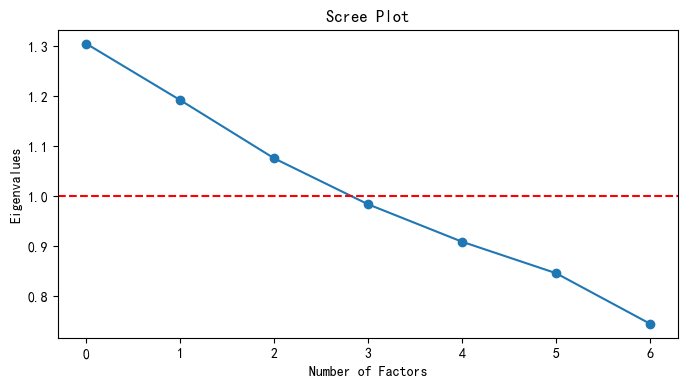

In [165]:
# Scree plot
plt.figure(figsize=(8, 4))
plt.plot(pca.explained_variance_, 'o-')
plt.title('Scree Plot')
plt.xlabel('Number of Factors')
plt.ylabel('Eigenvalues')
plt.axhline(1, color='red', linestyle='--')  # Kaiser criterion (eigenvalue = 1 line)
plt.show()


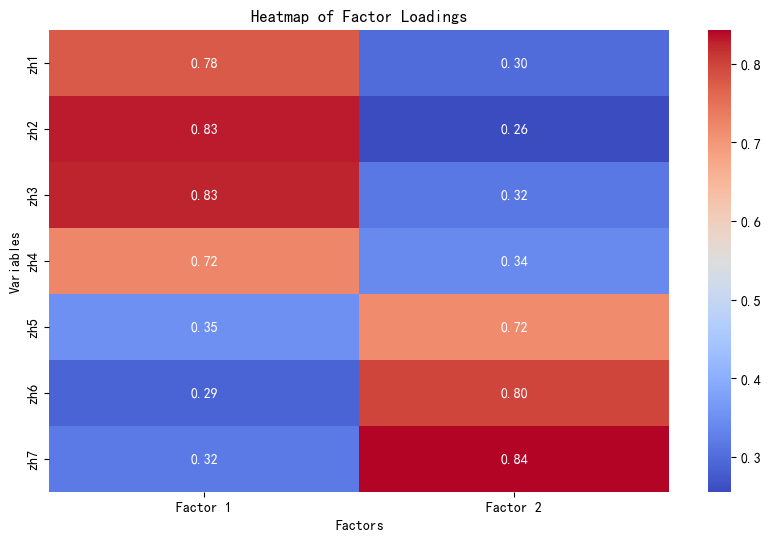

In [128]:
# Heatmap of loadings
plt.figure(figsize=(10, 6))
sns.heatmap(loadings, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=[f'Factor {i+1}' for i in range(2)],
            yticklabels=zh_data.columns)
plt.title('Heatmap of Factor Loadings')
plt.xlabel('Factors')
plt.ylabel('Variables')
plt.show()


In [180]:
loadings

{('zh1', 'Factor1'): 0.77584375,
 ('zh1', 'Factor2'): 0.0,
 ('zh2', 'Factor1'): 0.8317697,
 ('zh2', 'Factor2'): 0.0,
 ('zh3', 'Factor1'): 0.82675415,
 ('zh3', 'Factor2'): 0.0,
 ('zh4', 'Factor1'): 0.72239814,
 ('zh4', 'Factor2'): 0.0,
 ('zh5', 'Factor1'): 0.0,
 ('zh5', 'Factor2'): 0.71703745,
 ('zh6', 'Factor1'): 0.0,
 ('zh6', 'Factor2'): 0.79881387,
 ('zh7', 'Factor1'): 0.0,
 ('zh7', 'Factor2'): 0.84343081}

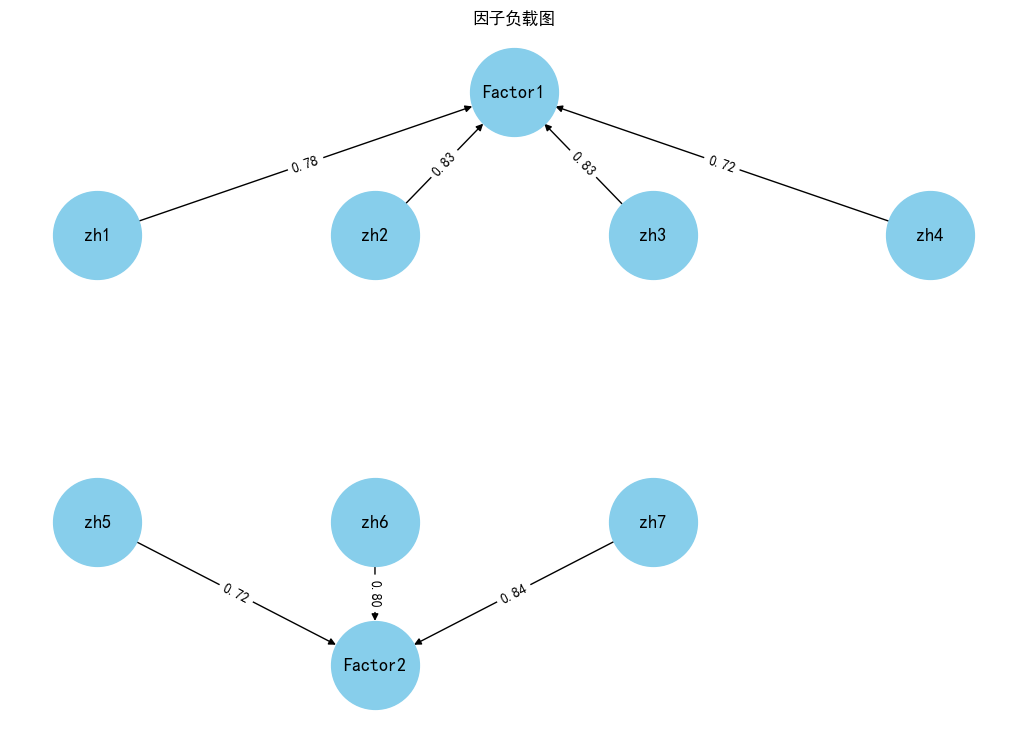

In [183]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Create a directed graph
G = nx.DiGraph()

# Define your nodes
nodes = ["zh1", "zh2", "zh3", "zh4", "zh5", "zh6", "zh7", "Factor1", "Factor2"]
G.add_nodes_from(nodes)

# Loadings as provided in the question
loading_array = fa.loadings_

# Assign loadings to edges based on the array and add edges only if loading > 0.5
variables = ["zh1", "zh2", "zh3", "zh4", "zh5", "zh6", "zh7"]
for i, var in enumerate(variables):
    if loading_array[i, 0] > 0.5:
        G.add_edge(var, "Factor1", label=f'{loading_array[i, 0]:.2f}')
    if loading_array[i, 1] > 0.5:
        G.add_edge(var, "Factor2", label=f'{loading_array[i, 1]:.2f}')

# Set up positions for nodes in space
pos = {
    "zh1": (0, 1),
    "zh2": (1, 1),
    "zh3": (2, 1),
    "zh4": (3, 1),
    "zh5": (0, -1),
    "zh6": (1, -1),
    "zh7": (2, -1),
    "Factor1": (1.5, 2),  # Position for Factor1
    "Factor2": (1, -2)    # Position for Factor2
}

# Draw the network
plt.figure(figsize=(13, 9))
nx.draw_networkx(G, pos, arrows=True, node_color="skyblue", with_labels=True, node_size=4000, font_size=13)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Display the graph
plt.title("因子负载图")
plt.axis('off')  # Turn off the axis numbers and ticks
plt.show()


# 5. CFA验证性因子分析Confirmatory Factor Analysis


In [184]:
#设定工作文件夹, 根据自己电脑的情况进行修改
datafolder='D:/tdata/tourist_CN_python/'
tourist=pd.read_feather(datafolder+'tourist.feather')

In [187]:
# Extract the relevant variables
te_data = tourist[['te1', 'te2', 'te3', 'te4', 'te5', 'te6', 'te7', 'te8']]

te1	thrill<p>
te2	indulgence<p>
te3	enjoyment<p>
te4	excitement<p>
te5	liberaty<p>
te6	freedom<p>
te7	refreshment<p>
te8	revitalization<p>
te1-te8 are 8 items with 2 dimensions(Hedonism and Refreshment) in the scale of Memorable Tourism Experiences<p>

Kim, J.-H., Ritchie, J. R. B., & McCormick, B. (2012). Development of a Scale to Measure Memorable Tourism Experiences. Journal of Travel Research, 51(1), 12–25. https://doi.org/10.1177/0047287510385467
<p>
<style>
    table {
        border-collapse: collapse;
        width: 100%;
    }
    th, td {
        border: 1px solid black;
        padding: 8px;
        text-align: left;
    }
    th {
        background-color: #f2f2f2;
    }
</style>

<table>
    <caption><strong>Table 6. Scale Items and Confirmatory Factor Analysis Results (validation sample)</strong></caption>
    <tr>
        <th>Factors</th>
        <th>Standardized Factor Loading</th>
        <th>Composite Reliabilities</th>
        <th>AVE</th>
        <th>SMC</th>
    </tr>
    <tr>
        <td rowspan="5">Hedonism</td>
        <td></td>
        <td>0.83</td>
        <td>0.54</td>
        <td></td>
    </tr>
    <tr>
        <td>Thrilled about having a new experience</td>
        <td>0.62</td>
        <td></td>
        <td>0.38</td>
    </tr>
    <tr>
        <td>Indulged in the activities</td>
        <td>0.75</td>
        <td></td>
        <td>0.57</td>
    </tr>
    <tr>
        <td>Really enjoyed this tourism experience</td>
        <td>0.80</td>
        <td></td>
        <td>0.64</td>
    </tr>
    <tr>
        <td>Exciting</td>
        <td>0.77</td>
        <td></td>
        <td>0.59</td>
    </tr>
    <tr>
        <td rowspan="5">Novelty</td>
        <td></td>
        <td>0.87</td>
        <td>0.64</td>
        <td></td>
    </tr>
    <tr>
        <td>Once-in-a lifetime experience</td>
        <td>0.76</td>
        <td></td>
        <td>0.58</td>
    </tr>
    <tr>
        <td>Unique</td>
        <td>0.91</td>
        <td></td>
        <td>0.83</td>
    </tr>
    <tr>
        <td>Different from previous experiences</td>
        <td>0.78</td>
        <td></td>
        <td>0.61</td>
    </tr>
    <tr>
        <td>Experienced something new</td>
        <td>0.72</td>
        <td></td>
        <td>0.52</td>
    </tr>
    <tr>
        <td rowspan="4">Local Culture</td>
        <td></td>
        <td>0.86</td>
        <td>0.67</td>
        <td></td>
    </tr>
    <tr>
        <td>Good impressions about the local people</td>
        <td>0.96</td>
        <td></td>
        <td>0.92</td>
    </tr>
    <tr>
        <td>Closely experienced the local culture</td>
        <td>0.82</td>
        <td></td>
        <td>0.67</td>
    </tr>
    <tr>
        <td>Local people in a destination were friendly</td>
        <td>0.65</td>
        <td></td>
        <td>0.42</td>
    </tr>
    <tr>
        <td rowspan="5">Refreshment</td>
        <td></td>
        <td>0.83</td>
        <td>0.56</td>
        <td></td>
    </tr>
    <tr>
        <td>Liberating</td>
        <td>0.76</td>
        <td></td>
        <td>0.58</td>
    </tr>
    <tr>
        <td>Enjoyed sense of freedom</td>
        <td>0.73</td>
        <td></td>
        <td>0.53</td>
    </tr>
    <tr>
        <td>Refreshing</td>
        <td>0.81</td>
        <td></td>
        <td>0.66</td>
    </tr>
    <tr>
        <td>Revitalized</td>
        <td>0.67</td>
        <td></td>
        <td>0.45</td>
    </tr>
    <tr>
        <td rowspan="3">Meaningfulness</td>
        <td></td>
        <td>0.83</td>
        <td>0.63</td>
        <td></td>
    </tr>
    <tr>
        <td>I did something meaningful</td>
        <td>0.80</td>
        <td></td>
        <td>0.64</td>
    </tr>
    <tr>
        <td>I did something important</td>
        <td>0.89</td>
        <td></td>
        <td>0.78</td>
    </tr>
    <tr>
        <td rowspan="4">Involvement</td>
        <td></td>
        <td>0.84</td>
        <td>0.63</td>
        <td></td>
    </tr>
    <tr>
        <td>I visited a place where I really wanted to go</td>
        <td>0.82</td>
        <td></td>
        <td>0.67</td>
    </tr>
    <tr>
        <td>I enjoyed activities which I really wanted to do</td>
        <td>0.81</td>
        <td></td>
        <td>0.66</td>
    </tr>
    <tr>
        <td>I was interested in the main activities of this tourism experience</td>
        <td>0.75</td>
        <td></td>
        <td>0.57</td>
    </tr>
    <tr>
        <td rowspan="3">Knowledge</td>
        <td></td>
        <td>0.88</td>
        <td>0.70</td>
        <td></td>
    </tr>
    <tr>
        <td>Exploratory</td>
        <td>0.79</td>
        <td></td>
        <td>0.62</td>
    </tr>
    <tr>
        <td>New culture</td>
        <td>0.84</td>
        <td></td>
        <td>0.71</td>
    </tr>
</table>

<p><em>Note:</em> χ² = 330.47, 221 degrees of freedom (p &lt; .001); comparative fit index = .97; incremental fit index = .97; nonnormed fit index = .97; root mean square error of approximation = .05; AVE = average variance extracted; SMC = squared multiple correlation.</p>


## 5.1 模型设定

In [189]:
import pandas as pd
from semopy.stats import calc_stats
from semopy import Model, semplot

# Define the CFA model specification
model_CFA = """
# Measurement model
Hedonism =~ te1 + te2 + te3 + te4
Refreshmen =~ te5 + te6 + te7 + te8
"""
model = Model(model_CFA)

## 5.2 CFA模型估计

In [190]:
# Fit the model
results = model.fit(te_data)

# Output parameter estimates
estimates = model.inspect()
print("Parameter Estimates:\n", estimates)

# Calculate and print goodness-of-fit statistics
stats = calc_stats(model)  # Correct function to obtain goodness-of-fit indices
print("Goodness-of-Fit Statistics:\n", stats)

Parameter Estimates:
           lval  op        rval  Estimate  Std. Err    z-value p-value
0          te1   ~    Hedonism  1.000000         -          -       -
1          te2   ~    Hedonism  1.210422  0.115645  10.466683     0.0
2          te3   ~    Hedonism  1.231438  0.105111  11.715563     0.0
3          te4   ~    Hedonism  1.269354  0.107942   11.75959     0.0
4          te5   ~  Refreshmen  1.000000         -          -       -
5          te6   ~  Refreshmen  1.166888  0.047212  24.716022     0.0
6          te7   ~  Refreshmen  0.893758  0.052671  16.968634     0.0
7          te8   ~  Refreshmen  0.897326  0.049329  18.190783     0.0
8     Hedonism  ~~    Hedonism  0.340342  0.056254   6.050138     0.0
9     Hedonism  ~~  Refreshmen  0.270278  0.037645   7.179584     0.0
10  Refreshmen  ~~  Refreshmen  0.698254  0.065261  10.699438     0.0
11         te1  ~~         te1  0.587650  0.047437  12.388103     0.0
12         te2  ~~         te2  0.551496   0.04735  11.647269     0.

## 5.3 CFA模型图示

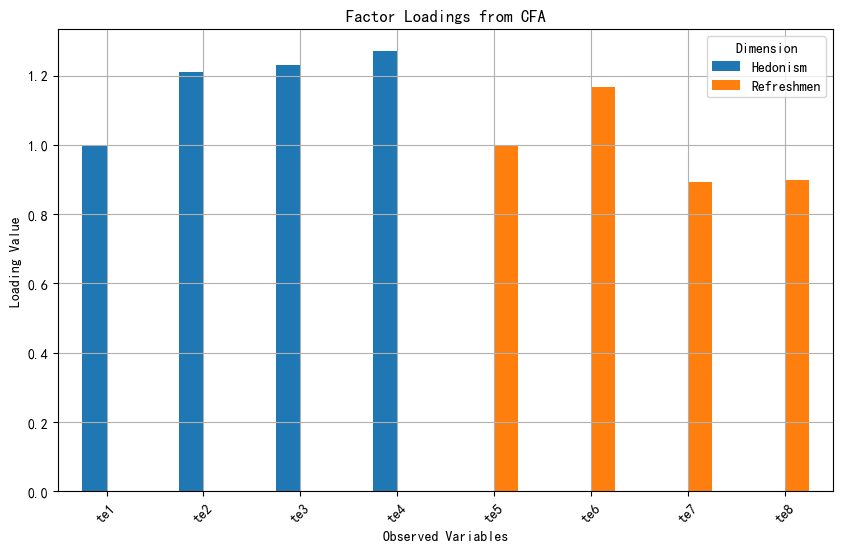

In [191]:
# Inspect model and extract loadings
params = model.inspect()
loadings = params[params['op'] == '~']  # Filter to show only loadings

# Create a DataFrame for plotting
loadings_df = pd.DataFrame({
    'Variable': loadings['lval'],
    'Factor': loadings['rval'],
    'Loading': loadings['Estimate']
})

# Pivot the DataFrame for easier plotting
pivot_df = loadings_df.pivot(index='Variable', columns='Factor', values='Loading')

# Plot
pivot_df.plot(kind='bar', figsize=(10, 6))
plt.title('Factor Loadings from CFA')
plt.ylabel('Loading Value')
plt.xlabel('Observed Variables')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Dimension')
plt.show()

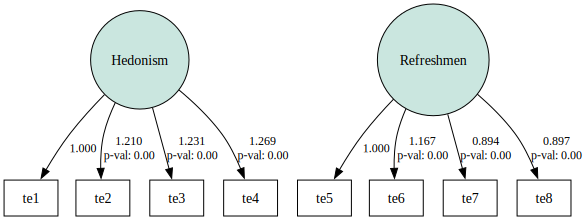

In [192]:
semplot(model, datafolder+"CF_model.png")

# 6.信度分析reliability analysis

In [193]:
#设定工作文件夹, 根据自己电脑的情况进行修改
datafolder='D:/tdata/tourist_CN_python/'
tourist=pd.read_feather(datafolder+'tourist.feather')

In [194]:
import pingouin as pg
# Function to calculate alpha if item deleted
def alpha_if_deleted(data):
    alpha_values = {}
    for column in data.columns:
        subset = data.drop(columns=[column])
        alpha = pg.cronbach_alpha(data=subset)[0]
        alpha_values[column] = alpha
    return alpha_values

In [195]:

# Assuming 'data' includes columns 'zh1' to 'zh7'
# Dimension A (zh1 to zh4)
dimension_a = zh_data[['zh1', 'zh2', 'zh3', 'zh4']]



# Calculate Cronbach's Alpha for each dimension
alpha_a = pg.cronbach_alpha(data=dimension_a)
print(f"Cronbach's Alpha for Dimension A: {alpha_a[0]}")

# Calculate alpha if item deleted for Dimension A and B
alpha_deleted_a = alpha_if_deleted(dimension_a)


# Convert to DataFrame for better visualization
alpha_a_df = pd.DataFrame.from_dict(alpha_deleted_a, orient='index', columns=['Alpha if Deleted'])


# Print the results
print("Alpha if item deleted for Dimension A:")
print(alpha_a_df)

Cronbach's Alpha for Dimension A: 0.9089158004682729
Alpha if item deleted for Dimension A:
     Alpha if Deleted
zh1          0.886658
zh2          0.876136
zh3          0.869162
zh4          0.895848


In [196]:
# Dimension B (zh5 to zh7)
dimension_b = zh_data[['zh5', 'zh6', 'zh7']]
alpha_b = pg.cronbach_alpha(data=dimension_b)
print(f"Cronbach's Alpha for Dimension B: {alpha_b[0]}")

# Calculate alpha if item deleted for Dimension A and B
alpha_deleted_b = alpha_if_deleted(dimension_b)

# Convert to DataFrame for better visualization
alpha_b_df = pd.DataFrame.from_dict(alpha_deleted_b, orient='index', columns=['Alpha if Deleted'])

# Print the results

print("\nAlpha if item deleted for Dimension B:")
print(alpha_b_df)

Cronbach's Alpha for Dimension B: 0.8847957696810433

Alpha if item deleted for Dimension B:
     Alpha if Deleted
zh5          0.866811
zh6          0.839001
zh7          0.800411
